# <font color='green'> <b>Car Price Prediction Project</b><font color='black'>

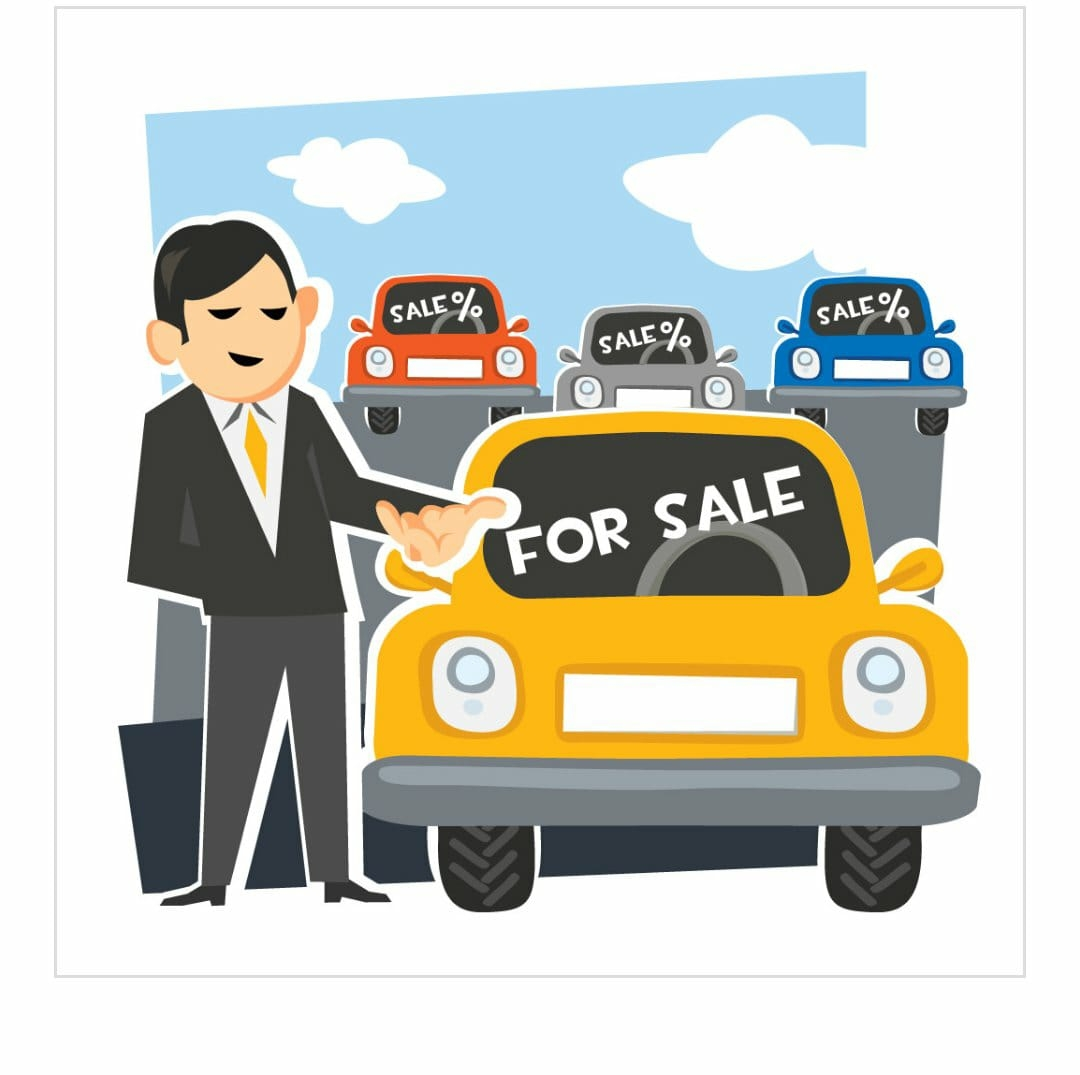

make_model: Contains the make and model information of the vehicles.<br>
body_type: Indicates the body type of the vehicles (e.g., sedan, hatchback).<br>
price: Contains the price information of the vehicles.<br>
vat: Contains value-added tax (VAT) information (often important in vehicle sales).<br>
km: Contains the mileage information of the vehicles.<br>
Type: Indicates the type of the vehicle (e.g., new, used).<br>
Fuel: Indicates the type of fuel used (e.g., petrol, diesel).<br>
Gears: Contains the number of gears in the vehicles.<br>
Comfort_Convenience: Contains the comfort and convenience features of the vehicles.<br>
Entertainment_Media: Contains entertainment and media features.<br>
Extras: Contains the extra features of the vehicles.<br>
Safety_Security: Contains safety features.<br>
age: The age of the vehicles.<br>
Previous_Owners: Contains the number of previous owners of the vehicles.<br>
hp_kW: Contains the horsepower of the vehicles in kilowatts.<br>
Inspection_new: Contains information about whether the vehicle has a new inspection.<br>
Paint_Type: Contains the type of paint of the vehicles.<br>
Upholstery_type: Contains the type of upholstery in the vehicles.<br>
Gearing_Type: Indicates the type of transmission in the vehicles.<br>
Displacement_cc: Indicates the engine displacement in cubic centimeters (cc).<br>
Weight_kg: Indicates the weight of the vehicles in kilograms.<br>
Drive_chain: Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).<br>
cons_comb: Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.<br>

In [212]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)  
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)  
pd.options.display.float_format = '{:.3f}'.format

## <font color='blue'> <b>Import Library</b><font color='black'>

# <font color='green'> <b>EDA and Data Cleaning</b><font color='black'>

## <font color='blue'> <b>Read Dataset</b><font color='black'>

In [213]:
df0 = pd.read_csv('final_scout_not_dummy.csv')
df = df0.copy()

## <font color='blue'> <b>Data Preprocessing</b><font color='black'>

In [214]:
df.head()

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears                                Comfort_Convenience  \
0  7.000  Air conditioning,Armrest,Automatic climate con...   
1  7.000  Air conditioning,Automatic climate control,Hil...   
2  7.000  Air conditioning,Cruise control,Electrical sid...   
3  6.000  Air suspension,Armrest,Auxiliary heating,Elect...   
4  7.000  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [216]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

make_model body_type  price               vat        km  Type  \
336           Audi A1   Compact  14990  Price negotiable 49351.000  Used   
337           Audi A1   Compact  14990  Price negotiable 49351.000  Used   
339           Audi A1   Compact  14990  Price negotiable 49351.000  Used   
340           Audi A1   Compact  14990  Price negotiable 49351.000  Used   
341           Audi A1   Compact  14990  Price negotiable 49351.000  Used   
...               ...       ...    ...               ...       ...   ...   
15819  Renault Espace       Van  50950    VAT deductible    11.000   New   
15820  Renault Espace       Van  52711    VAT deductible    11.000   New   
15823  Renault Espace       Van  52711    VAT deductible    11.000   New   
15808  Renault Espace       Van  54982    VAT deductible    11.000   New   
15810  Renault Espace       Van  54982    VAT deductible    11.000   New   

          Fuel  Gears                                Comfort_Convenience  \
336     Diesel  7.000  Air conditioning,Armrest,Automatic climate con...   
337     Diesel  7.000  Air conditioning,Armrest,Automatic climate con...   
339     Diesel  7.000  Air conditioning,Armrest,Automatic climate con...   
340     Diesel  7.000  Air conditioning,Armrest,Automatic climate con...   
341     Diesel  7.000  Air conditioning,Armrest,Automatic climate con...   
...        ...    ...                                                ...   
15819  Benzine  6.000  Air conditioning,Armrest,Automatic climate con...   
15820  Benzine  6.000  Air conditioning,Armrest,Automatic climate con...   
15823  Benzine  6.000  Air conditioning,Armrest,Automatic climate con...   
15808  Benzine  6.000  Air conditioning,Armrest,Automatic climate con...   
15810  Benzine  6.000  Air conditioning,Armrest,Automatic climate con...   

                                     Entertainment_Media  \
336    Bluetooth,CD player,Hands-free equipment,On-bo...   
337    Bluetooth,CD player,Hands-free equipment,On-bo...   
339    Bluetooth,CD player,Hands-free equipment,On-bo...   
340    Bluetooth,CD player,Hands-free equipment,On-bo...   
341    Bluetooth,CD player,Hands-free equipment,On-bo...   
...                                                  ...   
15819                                Digital radio,Radio   
15820                                Digital radio,Radio   
15823                                Digital radio,Radio   
15808                                Digital radio,Radio   
15810                                Digital radio,Radio   

                                       Extras  \
336    Alloy wheels,Sport seats,Voice Control   
337    Alloy wheels,Sport seats,Voice Control   
339    Alloy wheels,Sport seats,Voice Control   
340    Alloy wheels,Sport seats,Voice Control   
341    Alloy wheels,Sport seats,Voice Control   
...                                       ...   
15819              Alloy wheels,Voice Control   
15820              Alloy wheels,Voice Control   
15823              Alloy wheels,Voice Control   
15808              Alloy wheels,Voice Control   
15810              Alloy wheels,Voice Control   

                                         Safety_Security   age  \
336    ABS,Central door lock,Daytime running lights,D... 3.000   
337    ABS,Central door lock,Daytime running lights,D... 3.000   
339    ABS,Central door lock,Daytime running lights,D... 3.000   
340    ABS,Central door lock,Daytime running lights,D... 3.000   
341    ABS,Central door lock,Daytime running lights,D... 3.000   
...                                                  ...   ...   
15819  ABS,Daytime running lights,Driver-side airbag,... 0.000   
15820  ABS,Daytime running lights,Driver-side airbag,... 0.000   
15823  ABS,Daytime running lights,Driver-side airbag,... 0.000   
15808  ABS,Daytime running lights,Driver-side airbag,... 0.000   
15810  ABS,Daytime running lights,Driver-side airbag,... 0.000   

       Previous_Owners   hp_kW  Inspection_new Paint_Type    Upholstery_type  \
33

In [217]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")


duplicate_values(df)

Duplicate check...
There are 1673 duplicated observations in the dataset.
1673 duplicates were dropped!
No more duplicate rows!


In [218]:
df.shape

(14242, 23)

In [219]:
df.describe().T

count      mean       std      min       25%       50%  \
price           14242.000 18100.969  7421.214 4950.000 12950.000 16950.000   
km              14242.000 32582.110 36856.863    0.000  3898.000 21000.000   
Gears           14242.000     5.940     0.703    5.000     5.000     6.000   
age             14242.000     1.415     1.110    0.000     0.000     1.000   
Previous_Owners 14242.000     1.041     0.337    0.000     1.000     1.000   
hp_kW           14242.000    88.713    26.548   40.000    66.000    85.000   
Inspection_new  14242.000     0.256     0.437    0.000     0.000     0.000   
Displacement_cc 14242.000  1432.890   277.507  890.000  1229.000  1461.000   
Weight_kg       14242.000  1342.399   201.247  840.000  1165.000  1320.000   
cons_comb       14242.000     4.825     0.862    3.000     4.100     4.800   

                      75%        max  
price           21900.000  74600.000  
km              47000.000 317000.000  
Gears               6.000      8.000  
age                 2.000      3.000  
Previous_Owners     1.000      4.000  
hp_kW             103.000    294.000  
Inspection_new      1.000      1.000  
Displacement_cc  1598.000   2967.000  
Weight_kg        1487.000   2471.000  
cons_comb           5.400      9.100

In [220]:
df = df[df.hp_kW >50]

In [221]:
df.describe(include="object").T

count unique  \
make_model           14239      9   
body_type            14239      8   
vat                  14239      2   
Type                 14239      5   
Fuel                 14239      4   
Comfort_Convenience  14239   6195   
Entertainment_Media  14239    346   
Extras               14239    659   
Safety_Security      14239   4441   
Paint_Type           14239      3   
Upholstery_type      14239      2   
Gearing_Type         14239      3   
Drive_chain          14239      3   

                                                                   top   freq  
make_model                                                     Audi A3   2758  
body_type                                                       Sedans   7230  
vat                                                     VAT deductible  13423  
Type                                                              Used  10170  
Fuel                                                           Benzine   7556  
Comfort_Convenience  Air conditioning,Electrical side mirrors,Hill ...    312  
Entertainment_Media  Bluetooth,Hands-free equipment,On-board comput...   1561  
Extras                                                    Alloy wheels   5008  
Safety_Security      ABS,Central door lock,Daytime running lights,D...    635  
Paint_Type                                                    Metallic  13679  
Upholstery_type                                                  Cloth  10915  
Gearing_Type                                                    Manual   7230  
Drive_chain                                                      front  14064

## <font color='blue'> <b>Make Models</b><font color='black'>

In [222]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

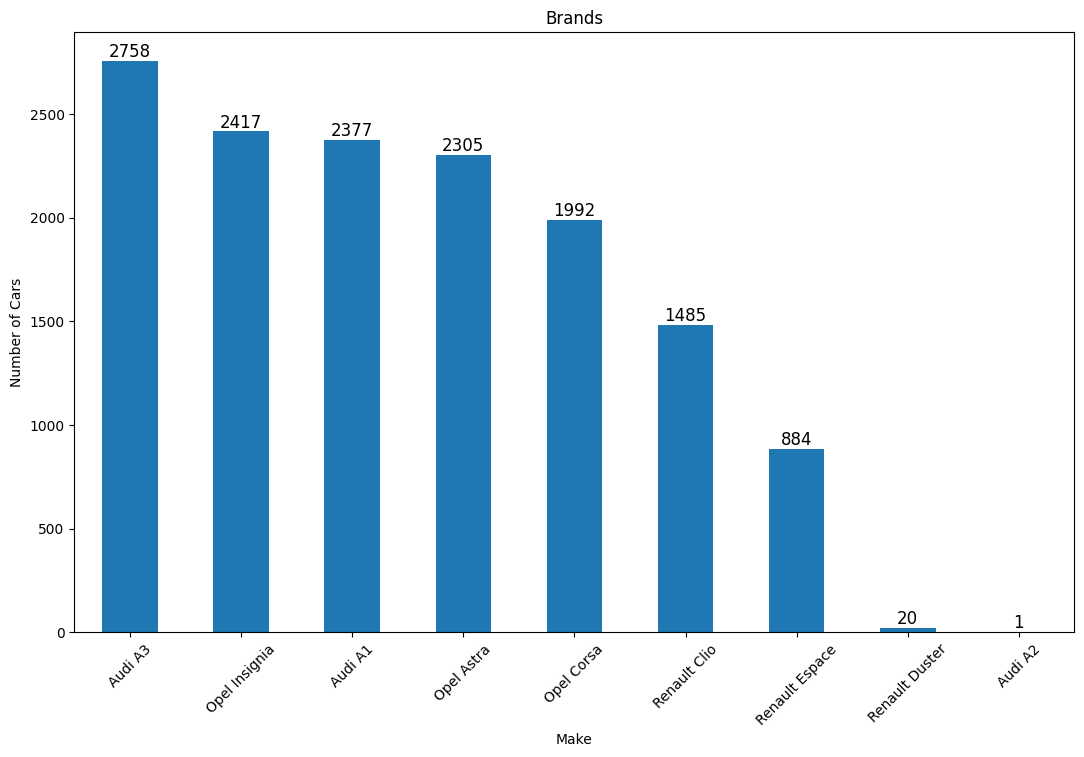

In [223]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.make_model.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Brands')   
plt.xlabel('Make') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

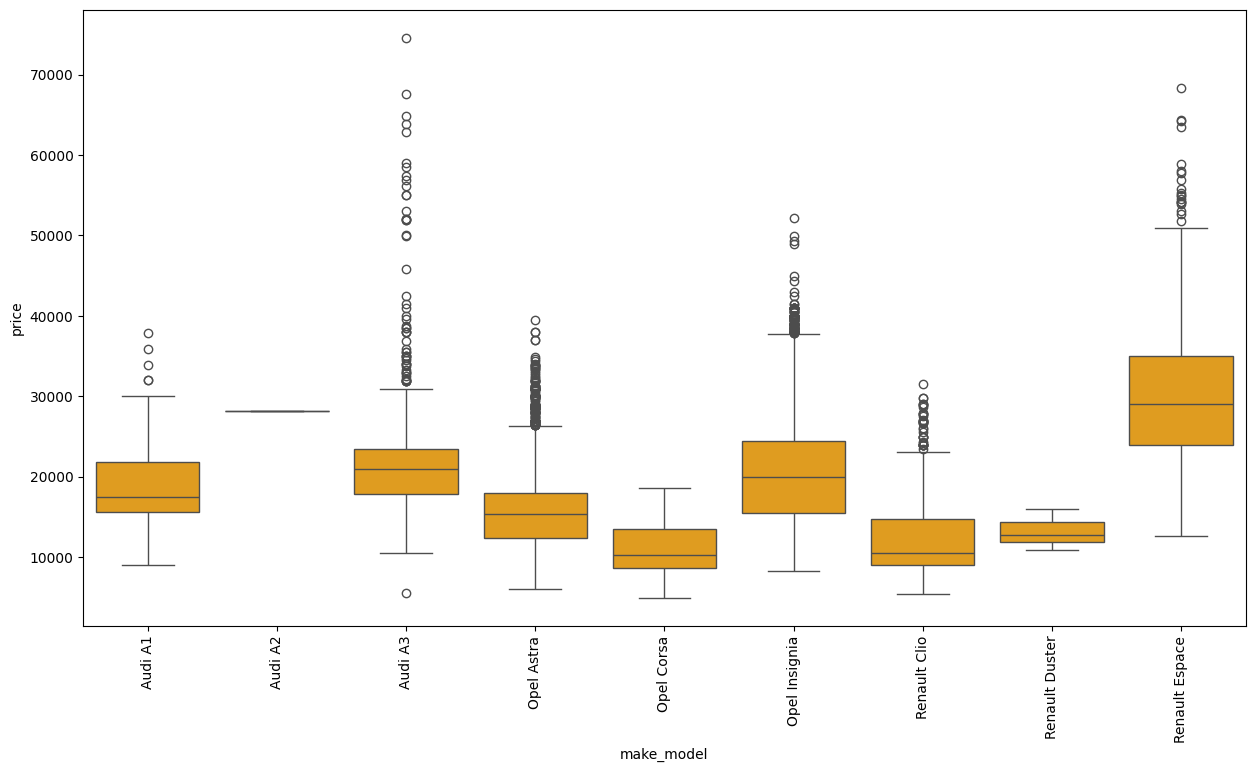

In [224]:
plt.figure(figsize = (15,8))
sns.boxplot(x="make_model", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Body Type</b><font color='black'>

In [225]:
df.body_type.unique()

array(['Sedans', 'Station wagon', 'Compact', 'Coupe', 'Van', 'Off-Road',
       'Convertible', 'Transporter'], dtype=object)

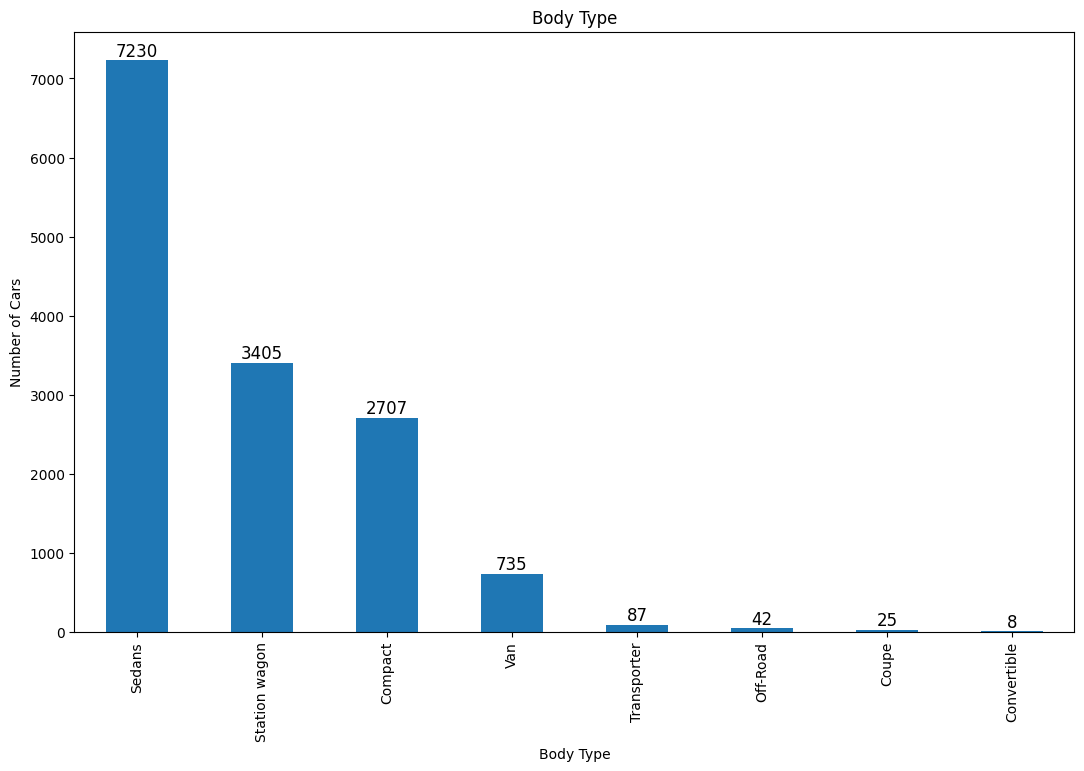

In [226]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.body_type.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Body Type')   
plt.xlabel('Body Type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [227]:
body_distr = df['body_type'].value_counts().reset_index(name='count')
body_distr.columns = ['body_type', 'count'] 

fig = px.pie(body_distr, values='count', names='body_type', title="Body Type Distribution")
fig.show()

## <font color='blue'> <b>Vat</b><font color='black'>

In [228]:
df.vat.unique()

array(['VAT deductible', 'Price negotiable'], dtype=object)

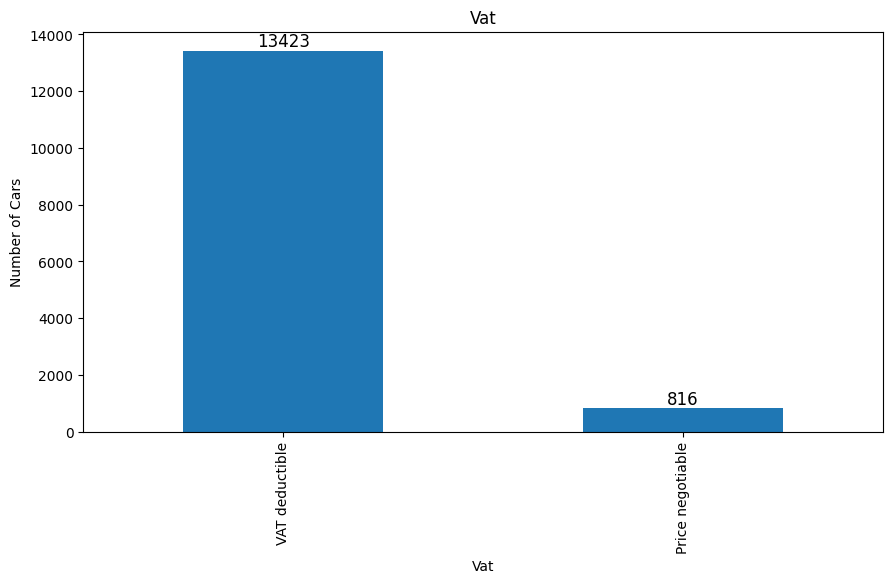

In [229]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_axes([0,0,1,1])
counts = df.vat.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Vat')   
plt.xlabel('Vat') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Milage</b><font color='black'>

In [230]:
vc = df.km.value_counts()
print(f'max milace:{vc.max()}, average milage: {vc.mean()}, min milage: {vc.min()}')

max milace:841, average milage: 2.128718792046644, min milage: 1


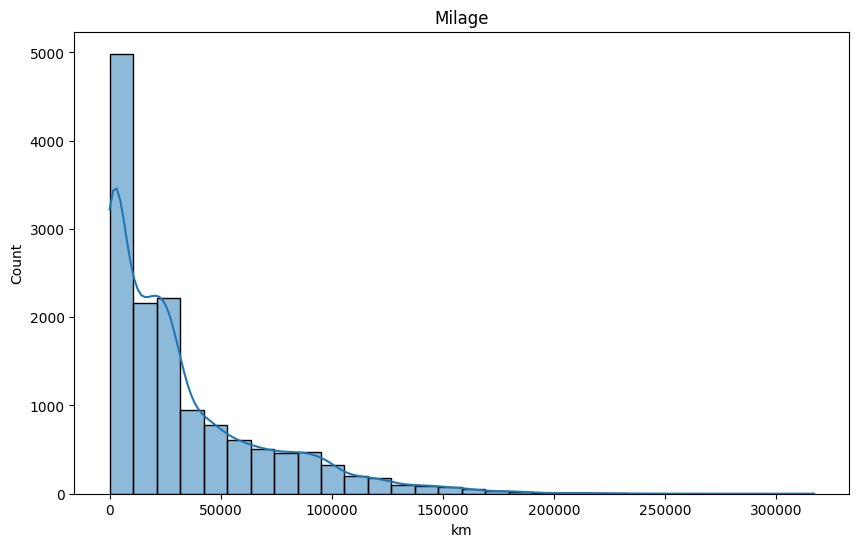

In [231]:
sns.histplot(data=df, x="km", bins=30, kde=True)
plt.title('Milage');

## <font color='blue'> <b>Type</b><font color='black'>

In [232]:
df.Type.unique()

array(['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered'],
      dtype=object)

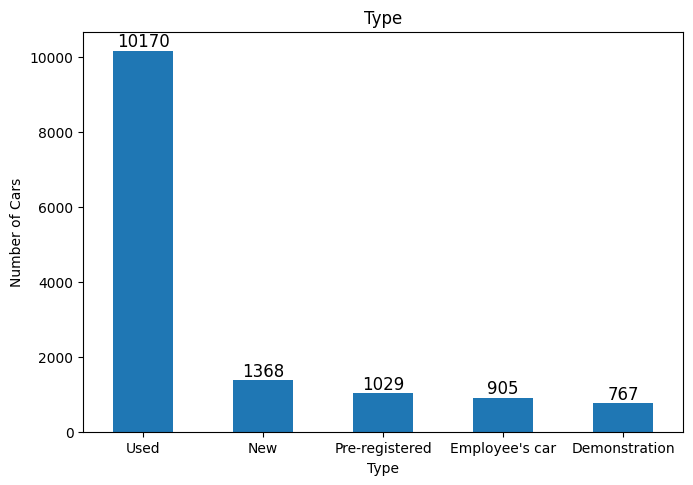

In [233]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Type.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Type')   
plt.xlabel('Type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Fuel Type</b><font color='black'>

In [234]:
df.Fuel.value_counts()

Fuel
Benzine     7556
Diesel      6618
LPG/CNG       60
Electric       5
Name: count, dtype: int64

In [235]:
df[df["Fuel"] == "Electric"]

make_model body_type  price               vat        km  Type  \
3356        Audi A3   Compact  24950    VAT deductible 57000.000  Used   
3612        Audi A3    Sedans  38450  Price negotiable 13800.000  Used   
3615        Audi A3    Sedans  35899  Price negotiable 20880.000  Used   
3617        Audi A3    Sedans  38000  Price negotiable 12000.000  Used   
13393  Renault Clio    Sedans   8490    VAT deductible 23863.000  Used   

           Fuel  Gears                                Comfort_Convenience  \
3356   Electric  6.000  Air conditioning,Armrest,Automatic climate con...   
3612   Electric  6.000  Air conditioning,Armrest,Automatic climate con...   
3615   Electric  6.000  Air conditioning,Power windows,Seat ventilatio...   
3617   Electric  6.000  Air conditioning,Armrest,Automatic climate con...   
13393  Electric  6.000  Air conditioning,Cruise control,Navigation system   

                                     Entertainment_Media  \
3356   Bluetooth,CD player,Digital radio,Hands-free e...   
3612   Bluetooth,CD player,Digital radio,Hands-free e...   
3615                                     Bluetooth,Radio   
3617   Bluetooth,CD player,Digital radio,Hands-free e...   
13393                                  On-board computer   

                                                  Extras  \
3356   Alloy wheels,Roof rack,Sport package,Sport sea...   
3612   Alloy wheels,Sport package,Sport seats,Voice C...   
3615                                        Alloy wheels   
3617   Alloy wheels,Shift paddles,Sport package,Sport...   
13393                                       Alloy wheels   

                                         Safety_Security   age  \
3356   ABS,Adaptive Cruise Control,Adaptive headlight... 3.000   
3612   ABS,Adaptive Cruise Control,Alarm system,Centr... 1.000   
3615   ABS,Adaptive Cruise Control,Alarm system,Centr... 1.000   
3617   ABS,Adaptive Cruise Control,Adaptive headlight... 1.000   
13393                                 Driver-side airbag 3.000   

       Previous_Owners   hp_kW  Inspection_new Paint_Type    Upholstery_type  \
3356             1.000 150.000               0   Metallic  Part/Full Leather   
3612             1.000 110.000               0   Metallic              Cloth   
3615             1.000 110.000               0   Metallic              Cloth   
3617             1.000 110.000               0   Metallic  Part/Full Leather   
13393            1.000  55.000               0   Metallic  Part/Full Leather   

         Gearing_Type  Displacement_cc  Weight_kg Drive_chain  cons_comb  
3356   Semi-automatic         1400.000   1280.000       front      4.100  
3612   Semi-automatic         1395.000   1615.000       front      4.000  
3615   Semi-automatic         1395.000   1615.000       front      4.000  
3617   Semi-automatic         1395.000   1615.000       front      4.000  
13393       Automatic         1461.000   1165.000       front      5.000

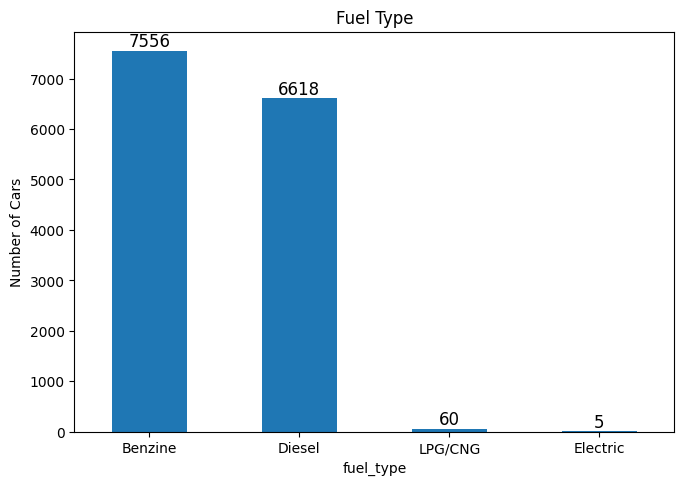

In [236]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Fuel.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Fuel Type')   
plt.xlabel('fuel_type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Gears</b><font color='black'>

In [237]:
df.Gears.unique()

array([7., 6., 5., 8.])

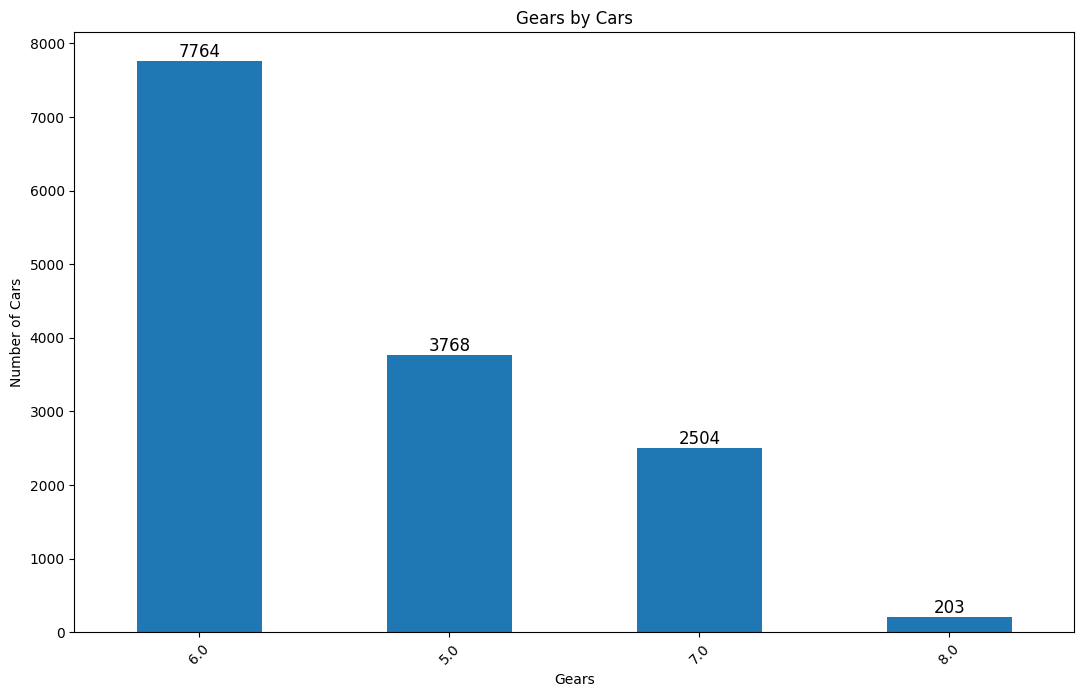

In [238]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.Gears.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Gears by Cars')   
plt.xlabel('Gears') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Comfort & Convenience</b><font color='black'>

In [239]:
df.Comfort_Convenience.nunique() # Since there are many values in this columns, it needs to be encoded

6195

In [240]:
df = df.join(df.Comfort_Convenience.str.get_dummies(sep=",").add_prefix('cc_'))

In [241]:
df.head(1)

make_model body_type  price             vat        km  Type    Fuel  Gears  \
0    Audi A1    Sedans  15770  VAT deductible 56013.000  Used  Diesel  7.000   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   

                                           Extras  \
0  Alloy wheels,Catalytic Converter,Voice Control   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   

   hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0 66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  cc_Air conditioning  \
0         1422.000   1220.000       front      3.800                    1   

   cc_Air suspension  cc_Armrest  cc_Automatic climate control  \
0                  0           1                             1   

   cc_Auxiliary heating  cc_Cruise control  cc_Electric Starter  \
0                     0                  1                    0   

   cc_Electric tailgate  cc_Electrical side mirrors  \
0                     0                           1   

   cc_Electrically adjustable seats  cc_Electrically heated windshield  \
0                                 0                                  0   

   cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
0                    0                         0               1   

   cc_Keyless central door lock  cc_Leather seats  cc_Leather steering wheel  \
0                             0                 0                          1   

   cc_Light sensor  cc_Lumbar support  cc_Massage seats  \
0                1                  0                 0   

   cc_Multi-function steering wheel  cc_Navigation system  cc_Panorama roof  \
0                                 1                     1                 0   

   cc_Park Distance Control  cc_Parking assist system camera  \
0                         1                                0   

   cc_Parking assist system self-steering  \
0                                       0   

   cc_Parking assist system sensors front  \
0                                       0   

   cc_Parking assist system sensors rear  cc_Power windows  cc_Rain sensor  \
0                                      1                 1               1   

   cc_Seat heating  cc_Seat ventilation  cc_Split rear seats  \
0                1                    0                    0   

   cc_Start-stop system  cc_Sunroof  cc_Tinted windows  cc_Wind deflector  \
0                     1           0                  0                  0   

   cc_Windshield  
0              0

## <font color='blue'> <b>Entertainment & Media</b><font color='black'>

In [242]:
df.Entertainment_Media.nunique()

346

In [243]:
df = df.join(df.Entertainment_Media.str.get_dummies(sep=",").add_prefix('em_'))

## <font color='blue'> <b>Extras</b><font color='black'>

In [244]:
df = df.join(df.Extras.str.get_dummies(sep=",").add_prefix('ex_'))

## <font color='blue'> <b>Safety Security</b><font color='black'>

In [245]:
df.Safety_Security.unique()

array(['ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights',
       'ABS,Central door lock,Central door lock with remote control,Daytime running lights,Driver-side airbag,Electronic stability control,Head airbag,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights',
       'ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control',
       ...,
       'ABS,Blind spot monitor,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Emergency brake assistant,Fog lights,Immobilizer,Lane departure warning system,LED Daytime Running Lights,LED Hea

In [246]:
df =df.join(df.Safety_Security.str.get_dummies(sep=",").add_prefix('ss_'))


In [247]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [248]:
df = pd.get_dummies(df, drop_first =True, dtype='int')

In [249]:
df.head()

price        km  Gears   age  Previous_Owners   hp_kW  Inspection_new  \
0  15770 56013.000  7.000 3.000            2.000  66.000               1   
1  14500 80000.000  7.000 2.000            1.000 141.000               0   
2  14640 83450.000  7.000 3.000            1.000  85.000               0   
3  14500 73000.000  6.000 3.000            1.000  66.000               0   
4  16790 16200.000  7.000 3.000            1.000  66.000               1   

   Displacement_cc  Weight_kg  cons_comb  cc_Air conditioning  \
0         1422.000   1220.000      3.800                    1   
1         1798.000   1255.000      5.600                    1   
2         1598.000   1135.000      3.800                    1   
3         1422.000   1195.000      3.800                    0   
4         1422.000   1135.000      4.100                    1   

   cc_Air suspension  cc_Armrest  cc_Automatic climate control  \
0                  0           1                             1   
1                  0           0                             1   
2                  0           0                             0   
3                  1           1                             0   
4                  0           1                             1   

   cc_Auxiliary heating  cc_Cruise control  cc_Electric Starter  \
0                     0                  1                    0   
1                     0                  0                    0   
2                     0                  1                    0   
3                     1                  0                    0   
4                     0                  0                    0   

   cc_Electric tailgate  cc_Electrical side mirrors  \
0                     0                           1   
1                     0                           0   
2                     0                           1   
3                     0                           1   
4                     0                           1   

   cc_Electrically adjustable seats  cc_Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc_Keyless central door lock  cc_Leather seats  cc_Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2                             0                 0                          1   
3                             0                 0                          1   
4                             0                 0                          1   

   cc_Light sensor  cc_Lumbar support  cc_Massage seats  \
0                1                  0                 0   
1                0                  1                 0   
2                0                  0                 0   
3                1                  1                 0   
4                1                  0                 0   

   cc_Multi-function steering wheel  cc_Navigation system  cc_Panorama roof  \
0                                 1                     1                 0   
1                                 0                     0                 0   
2                                 1                     1                 0   
3                 

In [250]:
df.shape

(14239, 134)

## <font color='blue'> <b>Age</b><font color='black'>

In [251]:
df.age.value_counts()

age
1.000    4282
0.000    3694
3.000    3341
2.000    2922
Name: count, dtype: int64

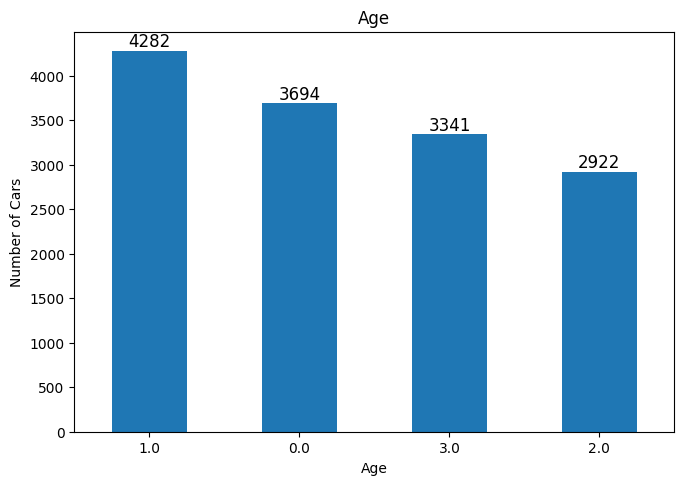

In [252]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.age.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Age')   
plt.xlabel('Age') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

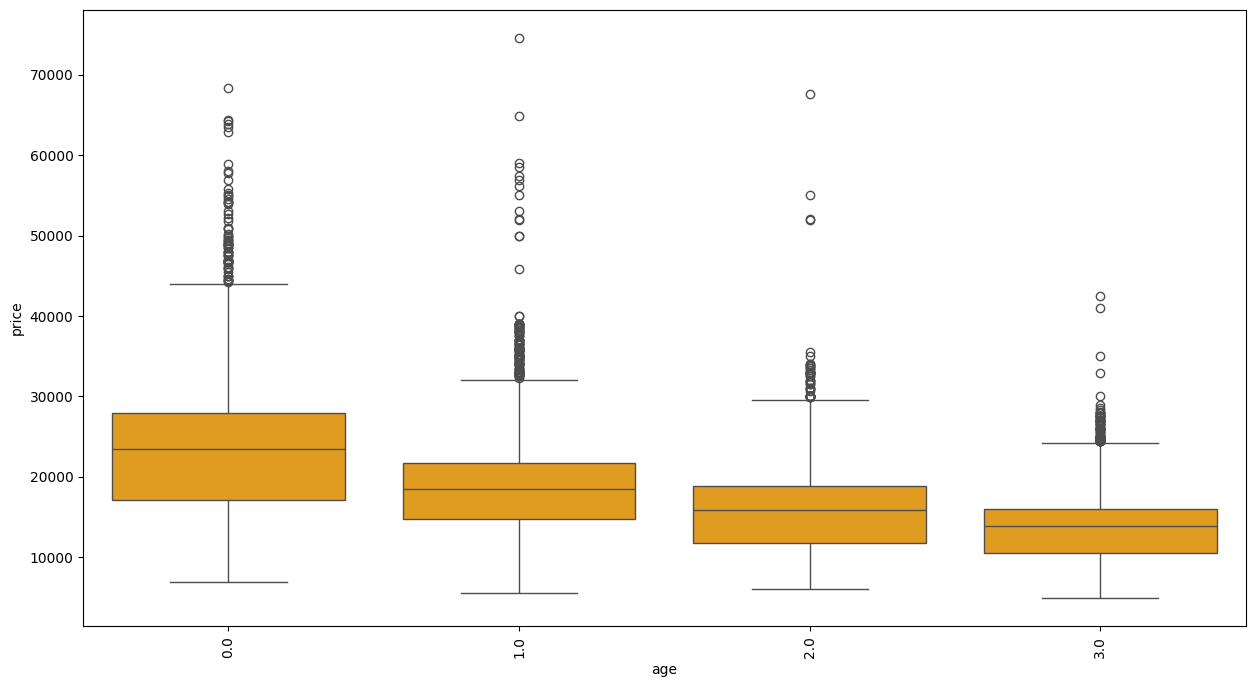

In [253]:
plt.figure(figsize = (15,8))
sns.boxplot(x="age", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Previous Owners</b><font color='black'>

In [254]:
df.Previous_Owners.unique()

array([2., 1., 0., 3., 4.])

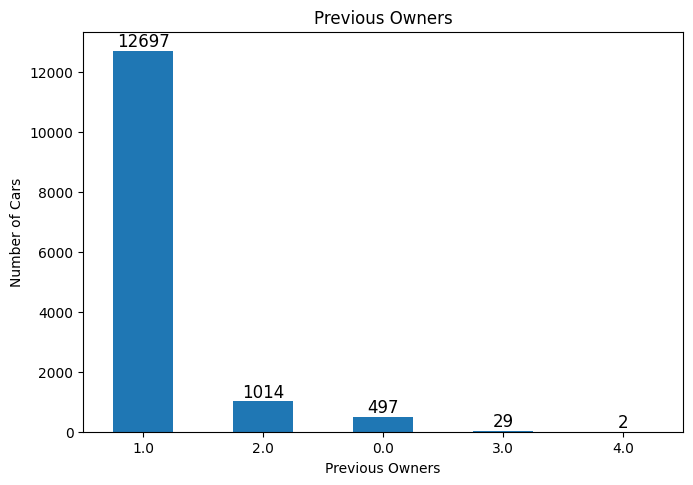

In [255]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Previous_Owners.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Previous Owners')   
plt.xlabel('Previous Owners') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

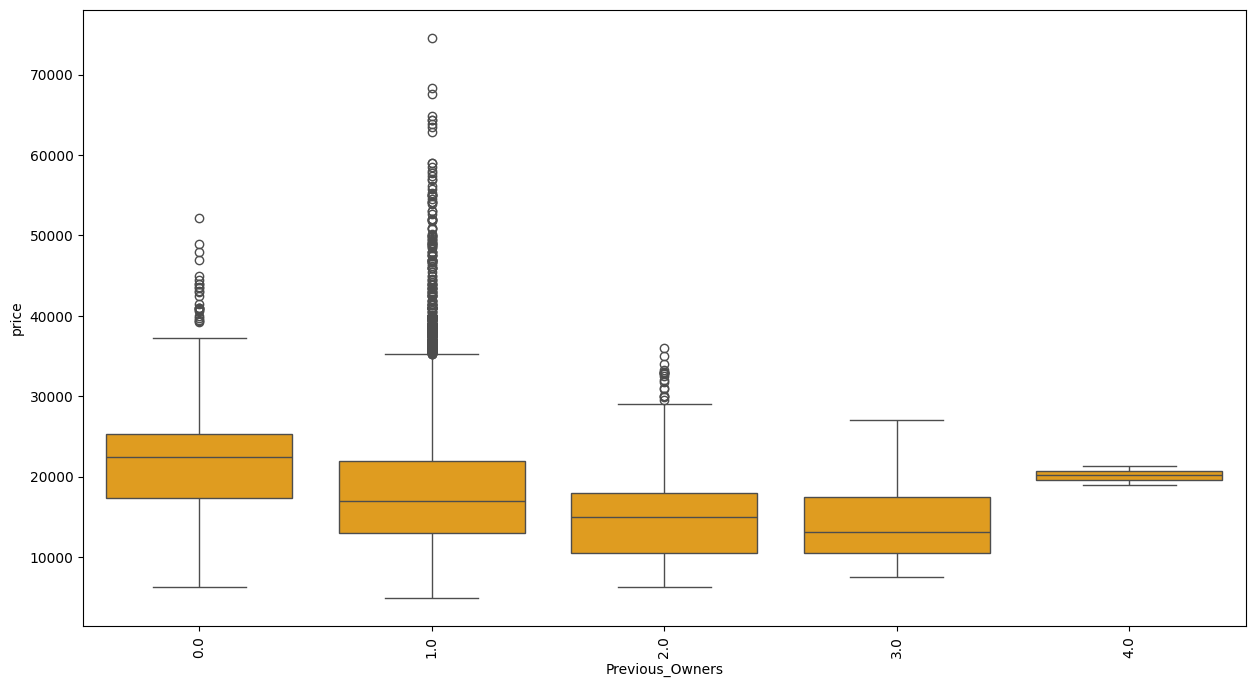

In [256]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Previous_Owners", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Power (hp_kW)</b><font color='black'>

In [257]:
df.hp_kW.unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  81.,  82., 135., 132., 100.,  96., 162.,
       150., 294., 228., 270., 137., 133.,  77., 101.,  78., 103.,  74.,
       118.,  84.,  88.,  80.,  76., 149.,  51.,  55.,  52.,  63.,  65.,
        75., 125., 120., 184., 239., 121., 143., 191.,  89., 195., 127.,
       122., 154., 155., 104., 123., 146.,  90.,  56.,  53.,  54., 164.,
       163.,  57., 119., 165., 117., 115.,  98., 168., 167.])

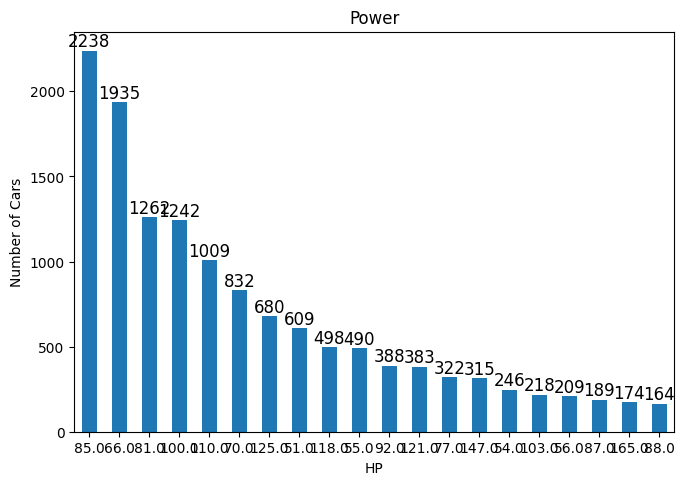

In [258]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.hp_kW.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Power')   
plt.xlabel('HP') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

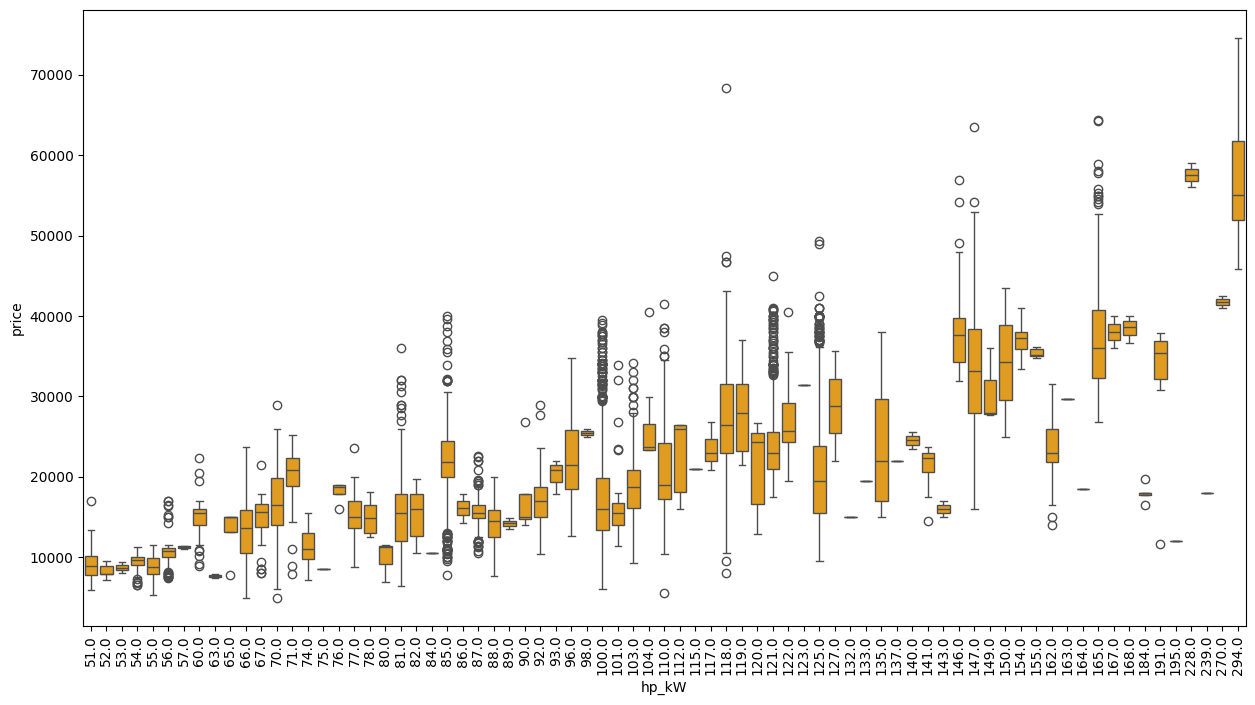

In [259]:
plt.figure(figsize = (15,8))
sns.boxplot(x="hp_kW", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Displacement</b><font color='black'>

In [262]:
df.Displacement_cc.unique()

array([1422., 1798., 1598.,  999., 1395.,  929., 1596., 1600., 1000.,
       1984., 1498., 1197.,  995.,  998., 1968., 1400., 2000., 1568.,
       1896., 2480., 1499., 1495., 1398., 1584.,  997., 1399., 1364.,
       1490.,  996., 1696., 1686., 1396., 1368., 1397., 1248., 1229.,
       1300., 1200., 1239., 1350., 1369., 1390., 1198., 1195., 1956.,
       1998., 2967., 1856., 1500., 1496., 1533., 1599., 1995., 1461.,
       1618., 1149., 1199.,  898.,  890.,  900., 1100., 1333.,  899.,
       1589., 1580., 1997., 1800.])

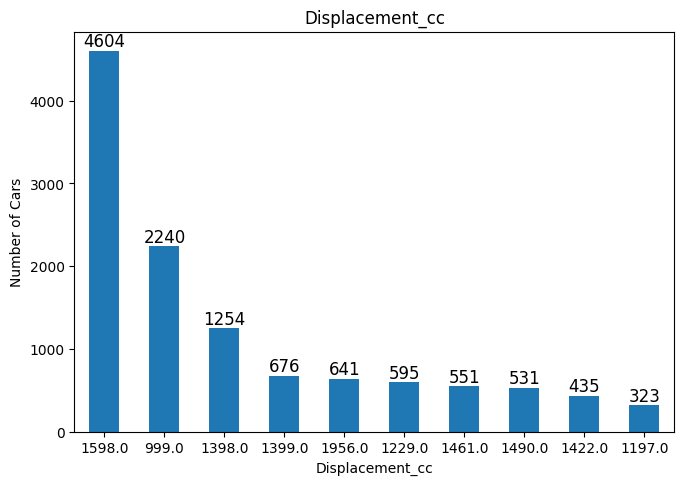

In [263]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Displacement_cc.value_counts().sort_values(ascending=False).head(10)
counts.plot(kind = "bar")
plt.title('Displacement_cc')   
plt.xlabel('Displacement_cc') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Weight</b><font color='black'>

In [264]:
df.Weight_kg.value_counts(ascending=False)

Weight_kg
1163.000    1409
1360.000    1244
1487.000     919
1135.000     787
1425.000     707
1180.000     585
1273.000     570
1503.000     509
1734.000     506
1165.000     487
1335.000     223
1365.000     201
1199.000     197
1087.000     193
1350.000     150
1260.000     113
1275.000     105
1355.000     103
1522.000     103
1255.000     103
1119.000     101
1278.000      99
1195.000      94
1280.000      88
1200.000      84
1120.000      82
1403.000      81
1250.000      81
1659.000      81
1701.000      76
1110.000      75
1285.000      74
1613.000      72
1308.000      72
1364.000      69
1685.000      69
1279.000      69
1441.000      66
1733.000      64
1141.000      60
1230.000      57
1845.000      54
1664.000      52
1345.000      51
1513.000      51
1052.000      50
1065.000      50
1071.000      49
1090.000      48
1209.000      48
1205.000      46
1154.000      45
1440.000      45
1585.000      43
1162.000      42
1134.000      42
1395.000      42
1088.000      42
1237

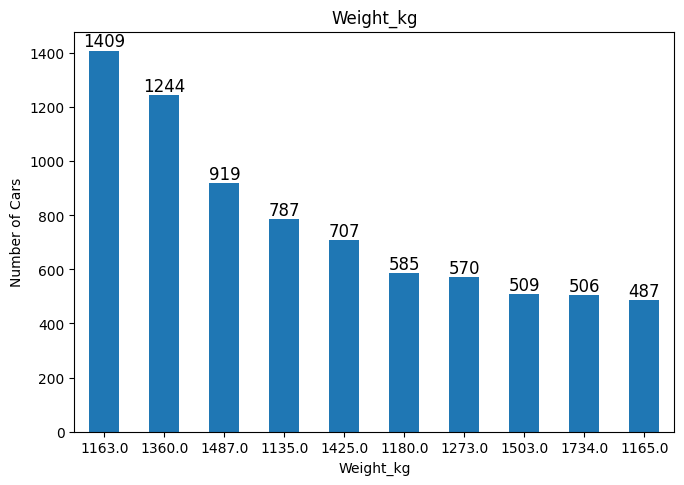

In [265]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Weight_kg.value_counts().sort_values(ascending=False).head(10)
counts.plot(kind = "bar")
plt.title('Weight_kg')   
plt.xlabel('Weight_kg') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>cons_comb</b><font color='black'>

In [266]:
df.cons_comb.value_counts(ascending=False)

cons_comb
5.600    917
4.000    915
5.400    750
4.700    725
4.500    708
3.900    681
5.000    667
4.400    648
4.200    564
3.800    556
4.800    528
5.100    519
5.300    472
4.900    465
5.200    403
4.600    373
4.100    335
3.700    333
5.700    332
5.500    329
6.000    313
5.900    306
4.300    282
3.500    243
3.300    224
6.200    213
3.600    198
6.100    160
5.800    143
6.600    141
6.300    135
3.400    106
6.800    101
6.400     72
3.000     64
7.400     58
6.700     39
7.100     36
6.500     27
3.200     25
6.900     21
8.300     20
3.450     19
7.600     12
7.000     10
3.100      7
7.200      6
8.000      5
8.600      4
3.650      4
7.800      3
8.700      3
5.150      3
3.950      3
7.300      2
5.450      2
4.550      2
7.900      2
8.100      2
4.300      1
9.100      1
7.500      1
Name: count, dtype: int64

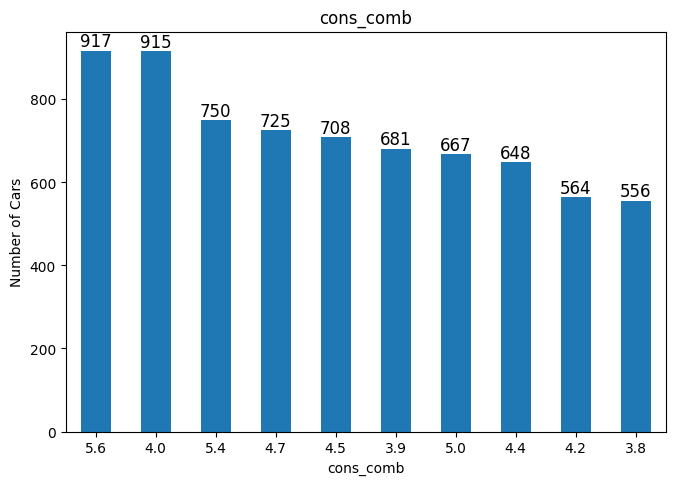

In [267]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.cons_comb.value_counts().sort_values(ascending=False).head(10)
counts.plot(kind = "bar")
plt.title('cons_comb')   
plt.xlabel('cons_comb') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Price</b><font color='black'>

In [269]:
df[df.price == df.price.min()]

price         km  Gears   age  Previous_Owners  hp_kW  Inspection_new  \
8825   4950 179521.000  5.000 3.000            1.000 70.000               0   

      Displacement_cc  Weight_kg  cons_comb  cc_Air conditioning  \
8825         1248.000   1163.000      3.200                    1   

      cc_Air suspension  cc_Armrest  cc_Automatic climate control  \
8825                  0           0                             1   

      cc_Auxiliary heating  cc_Cruise control  cc_Electric Starter  \
8825                     0                  0                    0   

      cc_Electric tailgate  cc_Electrical side mirrors  \
8825                     0                           1   

      cc_Electrically adjustable seats  cc_Electrically heated windshield  \
8825                                 0                                  0   

      cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
8825                    0                         0               0   

      cc_Keyless central door lock  cc_Leather seats  \
8825                             0                 0   

      cc_Leather steering wheel  cc_Light sensor  cc_Lumbar support  \
8825                          1                0                  0   

      cc_Massage seats  cc_Multi-function steering wheel  \
8825                 0                                 1   

      cc_Navigation system  cc_Panorama roof  cc_Park Distance Control  \
8825                     0                 0                         0   

      cc_Parking assist system camera  cc_Parking assist system self-steering  \
8825                                0                                       0   

      cc_Parking assist system sensors front  \
8825                                       0   

      cc_Parking assist system sensors rear  cc_Power windows  cc_Rain sensor  \
8825                                      0                 1               0   

      cc_Seat heating  cc_Seat ventilation  cc_Split rear seats  \
8825                0                    0                    1   

      cc_Start-stop system  cc_Sunroof  cc_Tinted windows  cc_Wind deflector  \
8825                     1           0                  0                  0   

      cc_Windshield  em_Bluetooth  em_CD player  em_Digital radio  \
8825              0             1             1                 0   

      em_Hands-free equipment  em_MP3  em_On-board computer  em_Radio  \
8825                        0       1                     1         0   

      em_Sound system  em_Television  em_USB  ex_Alloy wheels  \
8825                0              0       1                1   

      ex_Cab or rented Car  ex_Catalytic Converter  ex_Handicapped enabled  \
8825                     0                       0                       0   

      ex_Right hand drive  ex_Roof rack  ex_Shift paddles  ex_Ski bag  \
8825                    0             0                 0           0   

      ex_Sliding door  ex_Sport package  ex_Sport seats  ex_Sport suspension  \
8825                0                 0               0                    0   

      ex_Touch screen  ex_Trailer hitch  ex_Tuned car  ex_Voice Control  \
8825                0                 0             0                 0   

      ex_Winter tyres  ss_ABS  ss_Adaptive Cruise Control  \
8825                0       1                           0   

      ss_Adaptive headlights  ss_Alarm system  ss_Blind spot monitor  \
8825                       0                0                      0   

      ss_Central door lock  ss_Central door lock with remote control  \
8825                     0                                         1   

      ss_Daytime running lights  ss_Driver drowsiness detection  \
8825                          0                               0   

      ss_Driver-side airbag  ss_Electronic stability control  \
8825                      1                                1   

      ss_Emergency brake assistant  ss_Emergency system  ss_

In [270]:
df[df.price == df.price.max()]

price        km  Gears   age  Previous_Owners   hp_kW  Inspection_new  \
3648  74600 13000.000  7.000 1.000            1.000 294.000               0   

      Displacement_cc  Weight_kg  cons_comb  cc_Air conditioning  \
3648         2480.000   1490.000      8.300                    1   

      cc_Air suspension  cc_Armrest  cc_Automatic climate control  \
3648                  0           1                             1   

      cc_Auxiliary heating  cc_Cruise control  cc_Electric Starter  \
3648                     0                  0                    0   

      cc_Electric tailgate  cc_Electrical side mirrors  \
3648                     0                           1   

      cc_Electrically adjustable seats  cc_Electrically heated windshield  \
3648                                 0                                  0   

      cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
3648                    0                         0               0   

      cc_Keyless central door lock  cc_Leather seats  \
3648                             0                 0   

      cc_Leather steering wheel  cc_Light sensor  cc_Lumbar support  \
3648                          1                1                  0   

      cc_Massage seats  cc_Multi-function steering wheel  \
3648                 0                                 1   

      cc_Navigation system  cc_Panorama roof  cc_Park Distance Control  \
3648                     1                 1                         1   

      cc_Parking assist system camera  cc_Parking assist system self-steering  \
3648                                0                                       0   

      cc_Parking assist system sensors front  \
3648                                       1   

      cc_Parking assist system sensors rear  cc_Power windows  cc_Rain sensor  \
3648                                      1                 1               1   

      cc_Seat heating  cc_Seat ventilation  cc_Split rear seats  \
3648                1                    0                    0   

      cc_Start-stop system  cc_Sunroof  cc_Tinted windows  cc_Wind deflector  \
3648                     1           0                  0                  0   

      cc_Windshield  em_Bluetooth  em_CD player  em_Digital radio  \
3648              0             0             1                 0   

      em_Hands-free equipment  em_MP3  em_On-board computer  em_Radio  \
3648                        0       0                     1         1   

      em_Sound system  em_Television  em_USB  ex_Alloy wheels  \
3648                0              0       0                1   

      ex_Cab or rented Car  ex_Catalytic Converter  ex_Handicapped enabled  \
3648                     0                       0                       0   

      ex_Right hand drive  ex_Roof rack  ex_Shift paddles  ex_Ski bag  \
3648                    0             0                 0           0   

      ex_Sliding door  ex_Sport package  ex_Sport seats  ex_Sport suspension  \
3648                0                 0               1                    1   

      ex_Touch screen  ex_Trailer hitch  ex_Tuned car  ex_Voice Control  \
3648                0                 0             0                 0   

      ex_Winter tyres  ss_ABS  ss_Adaptive Cruise Control  \
3648                0       1                           0   

      ss_Adaptive headlights  ss_Alarm system  ss_Blind spot monitor  \
3648                       0                1                      0   

      ss_Central door lock  ss_Central door lock with remote control  \
3648                     1                                         0   

      ss_Daytime running lights  ss_Driver drowsiness detection  \
3648                          0                               0   

      ss_Driver-side airbag  ss_Electronic stability control  \
3648                      1                                1   

      ss_Emergency brake assistant  ss_Emergency system  ss_

In [274]:
corr = df.corr()["price"].sort_values()[:-1]
corr

age                                        -0.482
Gearing_Type_Manual                        -0.424
km                                         -0.402
make_model_Opel Corsa                      -0.384
Type_Used                                  -0.368
make_model_Renault Clio                    -0.281
Drive_chain_front                          -0.159
Previous_Owners                            -0.149
make_model_Opel Astra                      -0.130
em_CD player                               -0.107
ss_Central door lock with remote control   -0.084
em_On-board computer                       -0.067
body_type_Sedans                           -0.059
ss_Fog lights                              -0.054
ss_Power steering                          -0.053
ss_ABS                                     -0.048
ss_Isofix                                  -0.045
ss_Central door lock                       -0.045
ss_Head airbag                             -0.044
em_MP3                                     -0.044


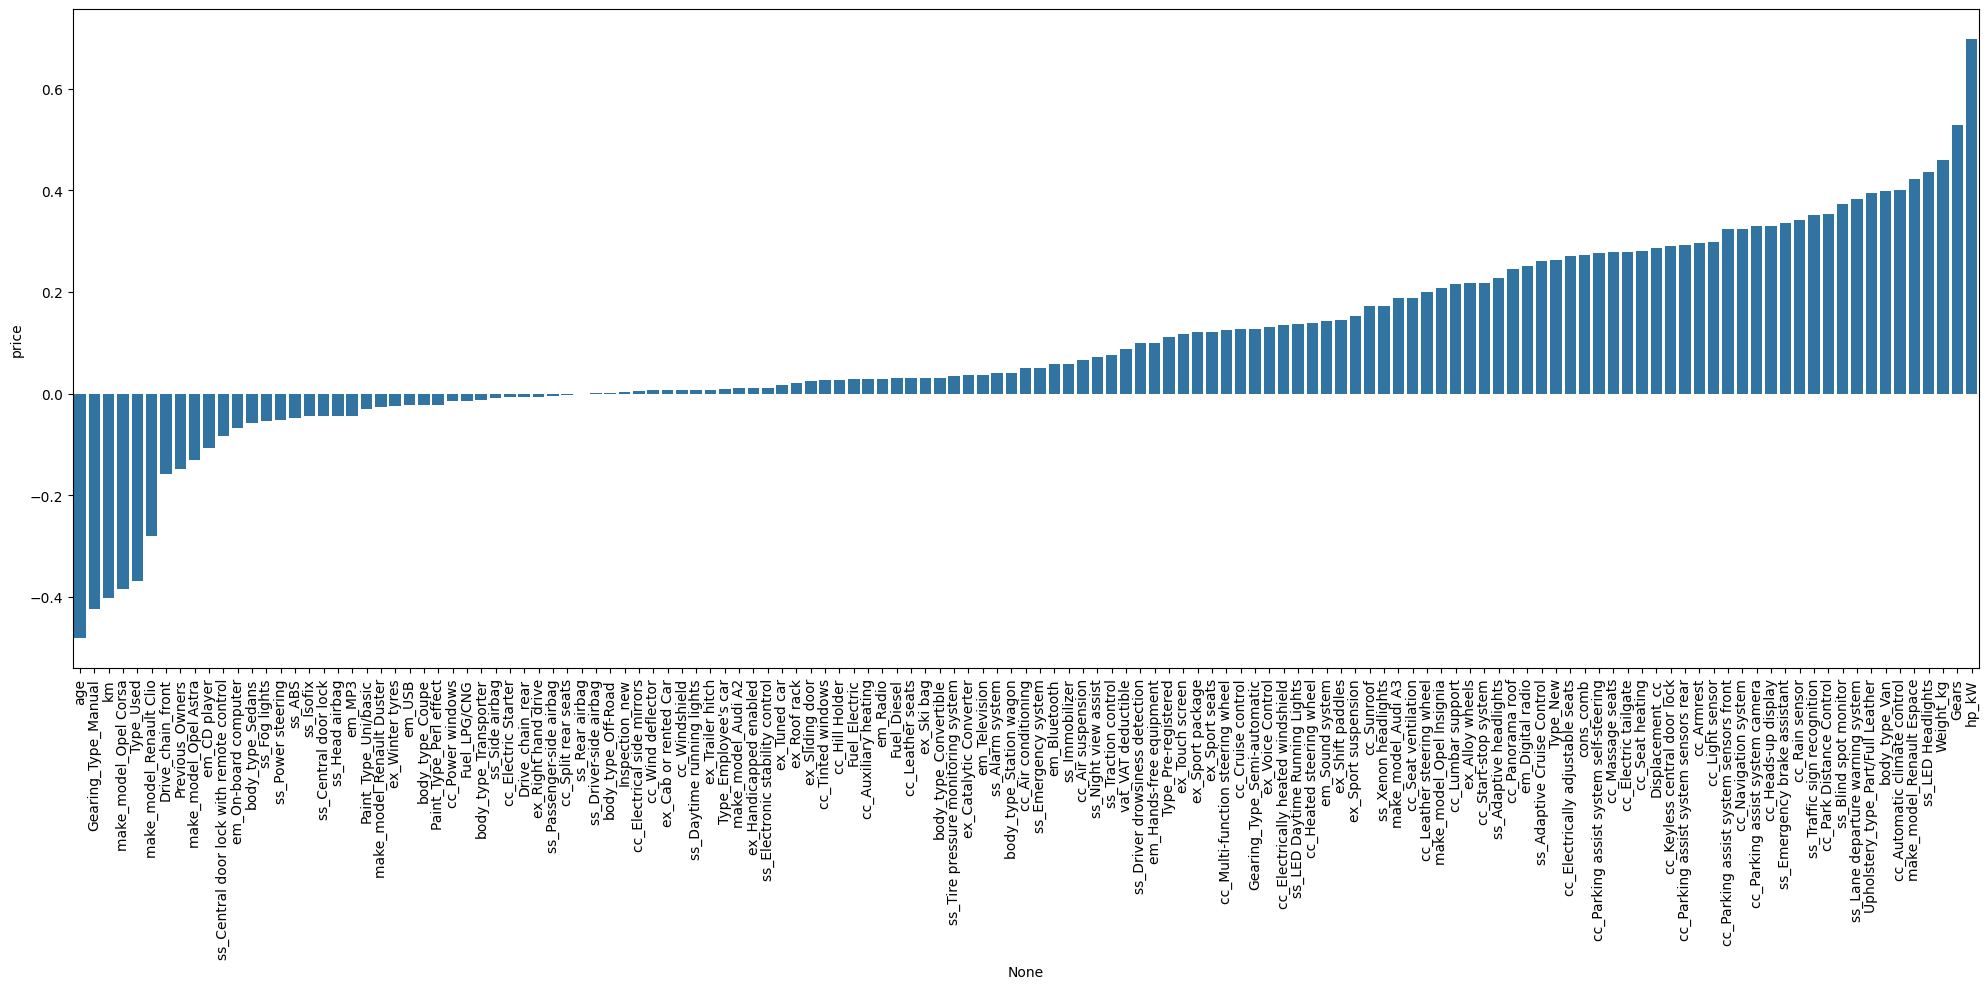

In [275]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr.index, y = corr)
plt.xticks(rotation=90)
plt.tight_layout();

In [276]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr().style.applymap(color_correlation1)

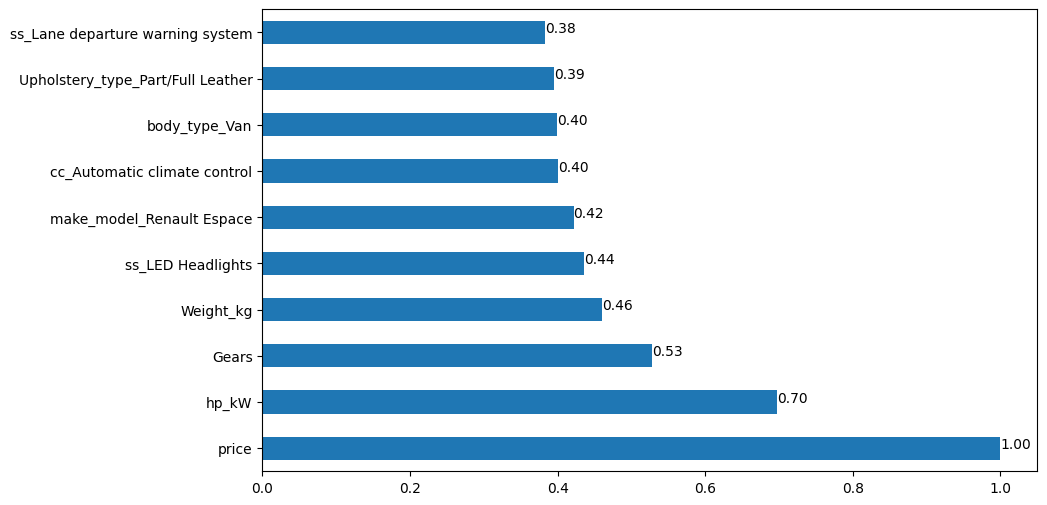

In [277]:
corr_values = numeric_df.corr()["price"].sort_values(ascending=False).head(10)
ax = corr_values.plot.barh()
for index, value in enumerate(corr_values):
    plt.text(value, index, "{:.2f}".format(value))

plt.show()

In [278]:
df.isnull().sum().sum()

0

## <font color='blue'> <b>Splitting the dataset into X(independent variables) and y (dependent variable)</b><font color='black'>

In [279]:
X = df.drop(['price'], axis=1)# independent variable
y = df['price'] # dependent variable

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [281]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11391, 133)
Train target shape   :  (11391,)
Test features shape  :  (2848, 133)
Test target shape    :  (2848,)


## <font color='blue'> <b>Scaling</b><font color='black'>

In [282]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [80]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 76%|███████▌  | 32/42 [07:35<00:31,  3.12s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [09:29<00:06,  6.73s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 12729, number of used features: 107
[LightGBM] [Info] Start training from score 18041.147301


100%|██████████| 42/42 [09:30<00:00, 13.59s/it]


In [81]:
models[:]

Adjusted R-Squared  \
Model                                                         
ExtraTreesRegressor                                    0.95   
LGBMRegressor                                          0.95   
HistGradientBoostingRegressor                          0.95   
XGBRegressor                                           0.95   
RandomForestRegressor                                  0.95   
BaggingRegressor                                       0.95   
GradientBoostingRegressor                              0.93   
DecisionTreeRegressor                                  0.91   
ExtraTreeRegressor                                     0.89   
PoissonRegressor                                       0.85   
LassoLarsCV                                            0.84   
LassoCV                                                0.84   
LassoLarsIC                                            0.84   
LarsCV                                                 0.84   
BayesianRidge                                          0.84   
LassoLars                                              0.84   
Lasso                                                  0.84   
RidgeCV                                                0.84   
Ridge                                                  0.84   
Lars                                                   0.84   
TransformedTargetRegressor                             0.84   
LinearRegression                                       0.84   
HuberRegressor                                         0.83   
PassiveAggressiveRegressor                             0.83   
KNeighborsRegressor                                    0.82   
ElasticNet                                             0.80   
OrthogonalMatchingPursuit                              0.78   
OrthogonalMatchingPursuitCV                            0.78   
GammaRegressor                                         0.77   
TweedieRegressor                                       0.77   
MLPRegressor                                           0.77   
AdaBoostRegressor                                      0.74   
ElasticNetCV                                           0.54   
NuSVR                                                 -0.01   
SVR                                                   -0.02   
DummyRegressor                                        -0.04   
LinearSVR                                             -0.22   
KernelRidge                                           -5.53   
GaussianProcessRegressor                            -964.73   
SGDRegressor                               -611727636849.12   
RANSACRegressor               -3126869474477330791399424.00   

                                                  R-Squared  \
Model                                                         
ExtraTreesRegressor                                    0.95   
LGBMRegressor                                          0.95   
HistGradientBoostingRegressor                          0.95   
XGBRegressor                                           0.95   
RandomForestRegressor                                  0.95   
BaggingRegressor                                       0.95   
GradientBoostingRegressor                              0.93   
DecisionTreeRegressor                                  0.91   
ExtraTreeRegressor                                     0.89   
PoissonRegressor                                       0.85   
LassoLarsCV                                            0.84   
LassoCV                                                0.84   
LassoLarsIC                                            0.84   
LarsCV                                                 0.84   
BayesianRidge                                          0.84   
LassoLars                                              0.84   
Lasso                                                  0.84   
RidgeCV                                                0.84   
Ridge                                                  0.84   
Lars    

## <font color='blue'> <b>Linear Regression</b><font color='black'>

In [322]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [323]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [324]:
lr.fit(X_train, y_train)

LinearRegression()

In [325]:
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [326]:
lrr = train_val(X_train, y_train, X_test, y_test, 'linear')
lrr

AttributeError: 'DataFrame' object has no attribute 'predict'

In [293]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)       # Modelin R2 değerini hesaplar
    n = df.shape[0]                     # Veri setindeki gözlem (örnek) sayısını alır
    p = df.shape[1]-1                   # Bağımsız değişkenlerin (feature ların) sayısını alır 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   # Adjusted R2 formülünü kullanarak değeri hesaplar
    return adj_r2

In [295]:
y_pred = lr.predict(X_test)

In [296]:
adj_r2(y_test, y_pred, df)

0.8861234558153102

## <font color='blue'> <b>Cross Validation</b><font color='black'>

In [302]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [303]:
pd.DataFrame(scores)

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
0     0.245       0.007    0.880     0.890                     -1699.958   
1     0.237       0.000    0.885     0.889                     -1790.202   
2     0.178       0.016    0.847     0.889                     -1761.238   
3     0.186       0.016    0.109     0.890                     -2090.274   
4     0.184       0.015    0.876     0.890                     -1739.666   
5     0.214       0.000    0.284     0.890                     -1884.144   
6     0.201       0.000    0.890     0.889                     -1748.970   
7     0.213       0.016    0.885     0.889                     -1732.618   
8     0.205       0.000    0.894     0.888                     -1708.820   
9     0.171       0.016    0.891     0.889                     -1720.232   

   train_neg_mean_absolute_error  test_neg_mean_squared_error  \
0                      -1715.306                 -5701553.701   
1                      -1706.610                 -6632290.168   
2                      -1708.874                 -8355687.338   
3                      -1687.004                -58589701.017   
4                      -1708.767                 -6288085.766   
5                      -1720.705                -37812526.359   
6                      -1705.002                 -6040615.170   
7                      -1710.945                 -6315835.836   
8                      -1709.733                 -5648458.984   
9                      -1712.098                 -5866161.528   

   train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
0                  -6107996.977                         -2387.793   
1                  -6006869.225                         -2575.323   
2                  -6049158.879                         -2890.621   
3                  -5873800.523                         -7654.391   
4                  -6051819.444                         -2507.606   
5                  -6057515.843                         -6149.189   
6                  -6073017.725                         -2457.766   
7                  -6040471.769                         -2513.133   
8                  -6116942.856                         -2376.649   
9                  -6094964.210                         -2422.016   

   train_neg_root_mean_squared_error  
0                          -2471.436  
1                          -2450.892  
2                          -2459.504  
3                          -2423.592  
4                          -2460.045  
5                          -2461.202  
6                          -2464.349  
7                          -2457.737  
8                          -2473.245  
9                          -2468.798

In [304]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                     0.744
train_r2                                    0.889
test_neg_mean_absolute_error            -1787.612
train_neg_mean_absolute_error           -1708.504
test_neg_mean_squared_error         -14725091.587
train_neg_mean_squared_error         -6047255.745
test_neg_root_mean_squared_error        -3393.449
train_neg_root_mean_squared_error       -2459.080
dtype: float64

In [305]:
2501/df.price.mean()

0.13815421068195144

In [306]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

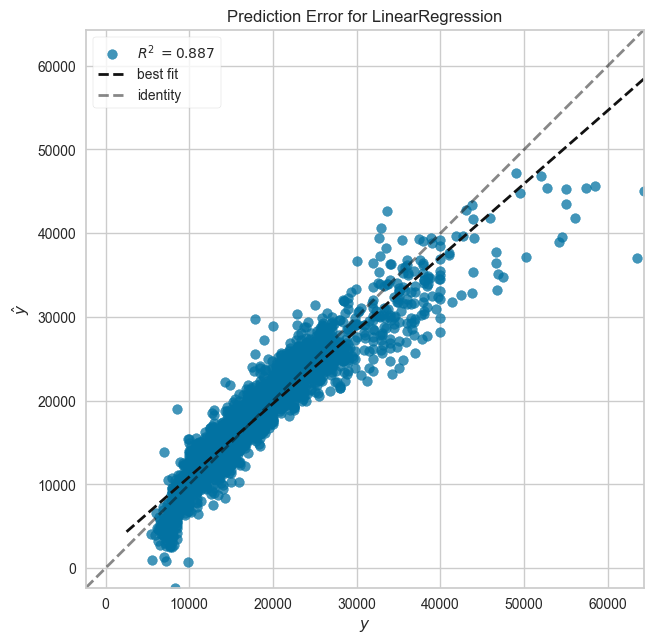

In [307]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

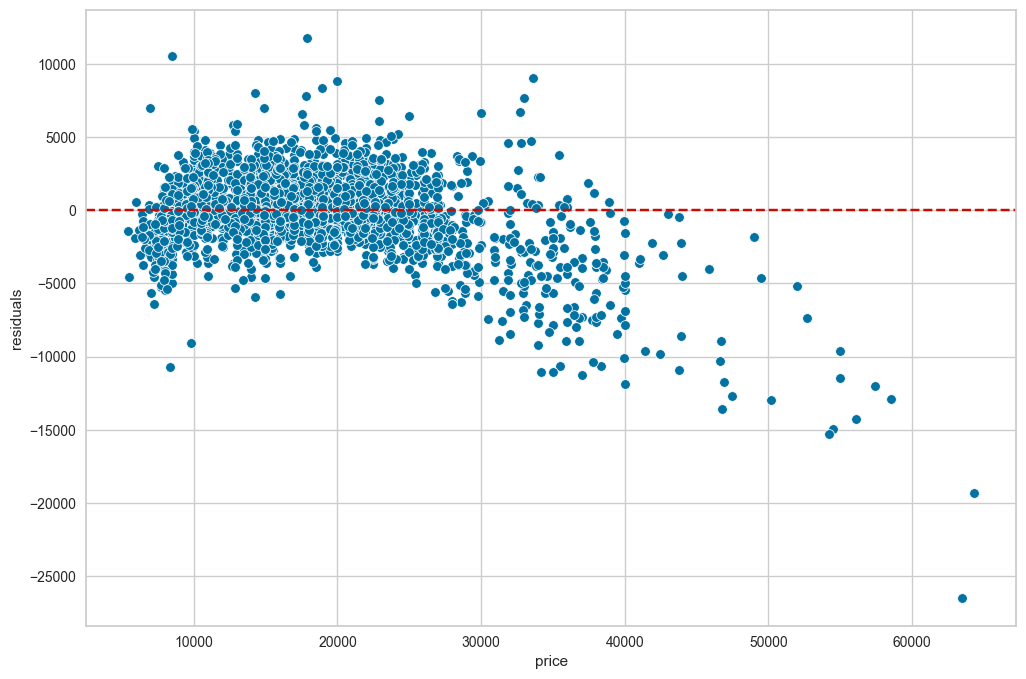

In [308]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

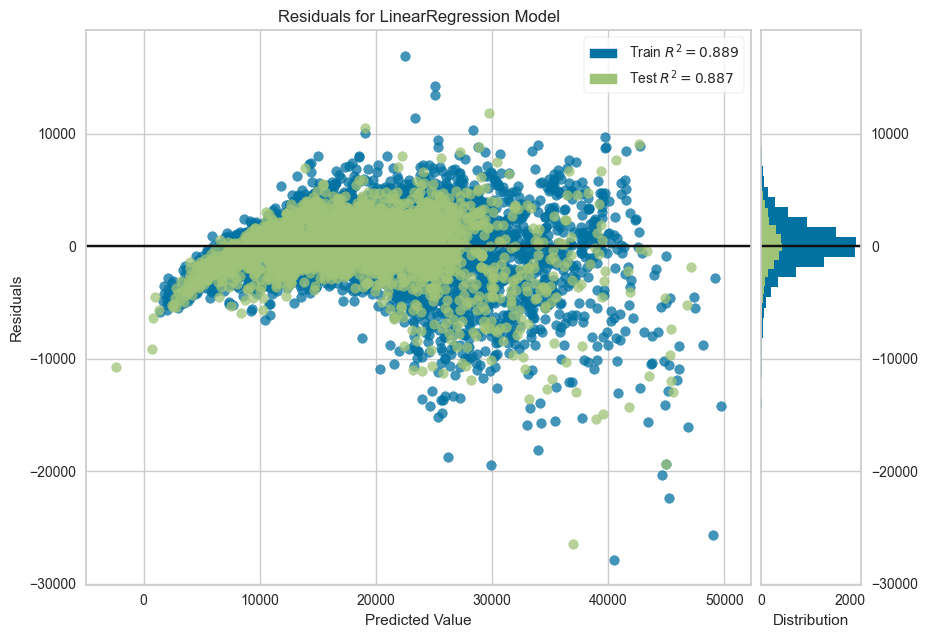

In [309]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();  

#### <font color='blue'> <b>Dropping observations from the dataset that worsen my predictions</b><font color='black'>

In [310]:
df1 = df[~(df.price>35000)]
df1.head()

price        km  Gears   age  Previous_Owners   hp_kW  Inspection_new  \
0  15770 56013.000  7.000 3.000            2.000  66.000               1   
1  14500 80000.000  7.000 2.000            1.000 141.000               0   
2  14640 83450.000  7.000 3.000            1.000  85.000               0   
3  14500 73000.000  6.000 3.000            1.000  66.000               0   
4  16790 16200.000  7.000 3.000            1.000  66.000               1   

   Displacement_cc  Weight_kg  cons_comb  cc_Air conditioning  \
0         1422.000   1220.000      3.800                    1   
1         1798.000   1255.000      5.600                    1   
2         1598.000   1135.000      3.800                    1   
3         1422.000   1195.000      3.800                    0   
4         1422.000   1135.000      4.100                    1   

   cc_Air suspension  cc_Armrest  cc_Automatic climate control  \
0                  0           1                             1   
1                  0           0                             1   
2                  0           0                             0   
3                  1           1                             0   
4                  0           1                             1   

   cc_Auxiliary heating  cc_Cruise control  cc_Electric Starter  \
0                     0                  1                    0   
1                     0                  0                    0   
2                     0                  1                    0   
3                     1                  0                    0   
4                     0                  0                    0   

   cc_Electric tailgate  cc_Electrical side mirrors  \
0                     0                           1   
1                     0                           0   
2                     0                           1   
3                     0                           1   
4                     0                           1   

   cc_Electrically adjustable seats  cc_Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc_Keyless central door lock  cc_Leather seats  cc_Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2                             0                 0                          1   
3                             0                 0                          1   
4                             0                 0                          1   

   cc_Light sensor  cc_Lumbar support  cc_Massage seats  \
0                1                  0                 0   
1                0                  1                 0   
2                0                  0                 0   
3                1                  1                 0   
4                1                  0                 0   

   cc_Multi-function steering wheel  cc_Navigation system  cc_Panorama roof  \
0                                 1                     1                 0   
1                                 0                     0                 0   
2                                 1                     1                 0   
3                 

In [312]:
X = df1.drop(columns = "price")
y = df1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [313]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

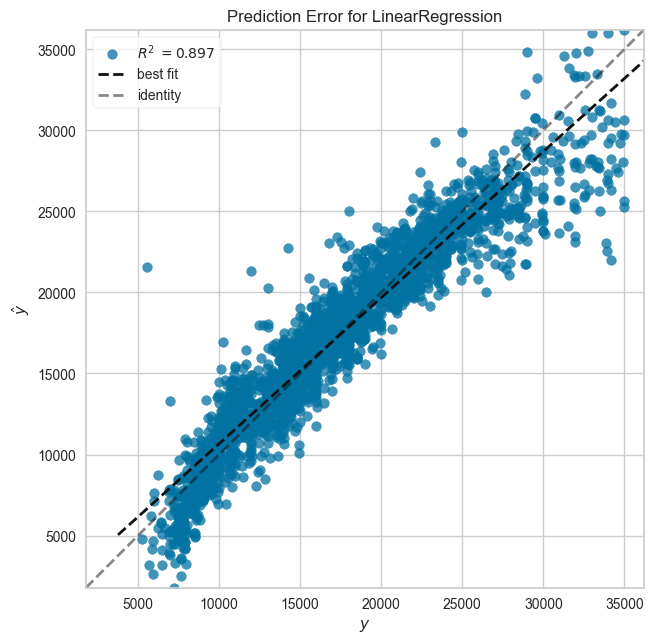

In [314]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [327]:
train_val(lm2, X_train, y_train, X_test, y_test)

train        test
R2         0.898       0.897
mae     1414.689    1410.872
mse  3789824.326 3840648.962
rmse    1946.747    1959.757

In [328]:
1959/df1.price.mean()

0.1131112405484233

In [329]:
2501/df.price.mean()

0.13815421068195144

In [331]:
pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

Coef
make_model_Renault Duster                -9345.160
make_model_Renault Clio                  -5393.440
make_model_Opel Corsa                    -5283.142
make_model_Opel Astra                    -3306.873
Type_Employee's car                      -2135.404
Type_Used                                -1957.189
Drive_chain_rear                         -1683.894
Gearing_Type_Manual                      -1600.531
age                                      -1462.061
Type_Pre-registered                      -1283.493
ex_Right hand drive                      -1200.356
Drive_chain_front                        -1089.097
cc_Electric Starter                      -1043.674
cc_Wind deflector                         -980.299
make_model_Opel Insignia                  -928.324
em_Television                             -828.269
Fuel_Electric                             -796.175
ex_Sliding door                           -613.116
ss_Rear airbag                            -601.668
ss_Emergency system                       -569.944
Type_New                                  -534.033
ex_Handicapped enabled                    -462.169
ss_Night view assist                      -406.428
cc_Panorama roof                          -387.812
body_type_Transporter                     -350.379
cc_Parking assist system sensors rear     -340.796
ex_Ski bag                                -325.682
ss_Isofix                                 -320.699
em_USB                                    -297.806
ss_Power steering                         -282.564
ss_Immobilizer                            -278.309
cc_Leather seats                          -273.501
ss_Driver-side airbag                     -270.727
cc_Air suspension                         -270.639
ss_Xenon headlights                       -260.847
em_Bluetooth                              -242.843
cc_Lumbar support                         -241.556
ss_Central door lock                      -205.210
ss_Central door lock with remote control  -184.550
cc_Power windows                          -182.524
ss_Electronic stability control           -182.276
ss_Daytime running lights                 -182.124
em_CD player                              -169.169
ss_LED Daytime Running Lights             -161.999
cc_Electric tailgate                      -148.074
ss_Tire pressure monitoring system        -113.008
cc_Rain sensor                            -111.666
em_Sound system                           -111.460
ex_Touch screen                           -104.643
ex_Roof rack                              -100.763
cc_Electrical side mirrors                 -99.397
em_On-board computer                       -99.079
body_type_Coupe                            -96.666
ss_Head airbag                             -87.362
ex_Voice Control                           -77.248
cc_Electrically adjustable seats           -75.879
ss_Alarm system                            -59.253
cc_Split rear seats                        -59.167
ss_Fog lights                              -38.562
ss_Driver drowsiness detection             -35.604
Inspection_new                             -11.716
Displacement_cc                             -1.138
Weight_kg                                   -1.120
km                                          -0.036
em_Hands-free equipment                     12.685
cc_Hill Holder                              17.633
cons_comb                                   18.582
cc_Armrest                                  26.116
ex_Sport seats                              59.217
em_Radio                                    64.180
em_MP3                                      66.858
ss_ABS                                      68.314
ss_Blind spot monitor                       69.944
hp_kW                                       71.212
cc_Light sensor                             74.557
body_type_Convertible                       87.747
ss_Adaptive headlights                      90.988
cc_Heated steering wheel                    95.782
cc_Seat heating  

## <font color='blue'> <b>RidgeCV</b><font color='black'>

In [332]:
from sklearn.linear_model import RidgeCV

In [333]:
alpha = np.linspace(10, 100, 100)
alpha

array([ 10.        ,  10.90909091,  11.81818182,  12.72727273,
        13.63636364,  14.54545455,  15.45454545,  16.36363636,
        17.27272727,  18.18181818,  19.09090909,  20.        ,
        20.90909091,  21.81818182,  22.72727273,  23.63636364,
        24.54545455,  25.45454545,  26.36363636,  27.27272727,
        28.18181818,  29.09090909,  30.        ,  30.90909091,
        31.81818182,  32.72727273,  33.63636364,  34.54545455,
        35.45454545,  36.36363636,  37.27272727,  38.18181818,
        39.09090909,  40.        ,  40.90909091,  41.81818182,
        42.72727273,  43.63636364,  44.54545455,  45.45454545,
        46.36363636,  47.27272727,  48.18181818,  49.09090909,
        50.        ,  50.90909091,  51.81818182,  52.72727273,
        53.63636364,  54.54545455,  55.45454545,  56.36363636,
        57.27272727,  58.18181818,  59.09090909,  60.        ,
        60.90909091,  61.81818182,  62.72727273,  63.63636364,
        64.54545455,  65.45454545,  66.36363636,  67.27

In [334]:
ridge_cv = RidgeCV(alphas = alpha, cv=5, scoring='neg_root_mean_squared_error')
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 10.        ,  10.90909091,  11.81818182,  12.72727273,
        13.63636364,  14.54545455,  15.45454545,  16.36363636,
        17.27272727,  18.18181818,  19.09090909,  20.        ,
        20.90909091,  21.81818182,  22.72727273,  23.63636364,
        24.54545455,  25.45454545,  26.36363636,  27.27272727,
        28.18181818,  29.09090909,  30.        ,  30.90909091,
        31.81818182,  32.72727273,  33.63636364,  34.54545455,
        35.45454545,  36.3...
        75.45454545,  76.36363636,  77.27272727,  78.18181818,
        79.09090909,  80.        ,  80.90909091,  81.81818182,
        82.72727273,  83.63636364,  84.54545455,  85.45454545,
        86.36363636,  87.27272727,  88.18181818,  89.09090909,
        90.        ,  90.90909091,  91.81818182,  92.72727273,
        93.63636364,  94.54545455,  95.45454545,  96.36363636,
        97.27272727,  98.18181818,  99.09090909, 100.        ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [335]:
ridge_cv.alpha_

10.0

In [336]:
y_pred = ridge_cv.predict(X_test)
y_train_pred = ridge_cv.predict(X_train)

In [340]:
rcv = train_val(ridge_cv, X_train, y_train, X_test, y_test)
rcv

train        test
R2         0.897       0.896
mae     1419.603    1413.602
mse  3819787.439 3864155.861
rmse    1954.428    1965.746

In [341]:
ridge_cv.coef_

array([-3.60460060e-02,  6.40257602e+02, -1.45471933e+03,  2.35285109e+02,
        7.55325725e+01, -1.73789924e+01, -1.49557112e+00, -9.52477379e-01,
        1.57512762e+01,  3.27088579e+02, -1.35778478e+02,  6.29578736e+01,
        1.65746281e+02,  1.12326175e+02,  2.62228079e+02, -9.95847176e+01,
       -1.25425751e+02, -1.08788951e+02, -7.46059636e+01,  1.28794133e+02,
        5.31548008e+02,  3.53119435e+01, -7.16211739e+00,  3.38060287e+02,
       -2.65745230e+02,  1.92021346e+02,  7.40544824e+01, -2.26880831e+02,
        6.67208494e+02,  2.03284518e+02,  1.96313295e+02, -3.03255066e+02,
        4.77263586e+02,  1.29219967e+02,  2.04593169e+02,  8.80660297e+01,
       -3.29417868e+02, -1.47298935e+02, -1.00915215e+02,  1.45541163e+02,
        1.71695263e+02, -4.91784220e+01,  2.17748159e+02,  3.93239495e+02,
        2.04844472e+02, -7.58098304e+02,  3.62335036e+01, -2.42689229e+02,
       -1.73534859e+02,  5.64926712e+02,  1.28651370e+01,  7.60455108e+01,
       -1.14892804e+02,  

## <font color='blue'> <b>LassoCV</b><font color='black'>

In [342]:
from sklearn.linear_model import Lasso, LassoCV

In [343]:
alpha = np.linspace(1, 5, 100)
alpha

array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.21212121, 2.25252525, 2.29292929, 2.33333333, 2.37373737,
       2.41414141, 2.45454545, 2.49494949, 2.53535354, 2.57575758,
       2.61616162, 2.65656566, 2.6969697 , 2.73737374, 2.77777778,
       2.81818182, 2.85858586, 2.8989899 , 2.93939394, 2.97979798,
       3.02020202, 3.06060606, 3.1010101 , 3.14141414, 3.18181818,
       3.22222222, 3.26262626, 3.3030303 , 3.34343434, 3.38383838,
       3.42424242, 3.46464646, 3.50505051, 3.54545455, 3.58585859,
       3.62626263, 3.66666667, 3.70707071, 3.74747475, 3.78787879,
       3.82828283, 3.86868687, 3.90909091, 3.94949495, 3.98989

In [344]:
lasso_cv = LassoCV(alphas=alpha, cv=5, max_iter=10000, random_state=19)

In [345]:
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.212121...
       3.82828283, 3.86868687, 3.90909091, 3.94949495, 3.98989899,
       4.03030303, 4.07070707, 4.11111111, 4.15151515, 4.19191919,
       4.23232323, 4.27272727, 4.31313131, 4.35353535, 4.39393939,
       4.43434343, 4.47474747, 4.51515152, 4.55555556, 4.5959596 ,
       4.63636364, 4.67676768, 4.71717172, 4.75757576, 4.7979798 ,
       4.83838384, 4.87878788, 4.91919192, 4.95959596, 5.        ]),
        cv=5, max_iter=10000, random_state=19)

In [346]:
lasso_cv.alpha_

1.0

In [347]:
y_pred = lasso_cv.predict(X_test)
y_train_pred = lasso_cv.predict(X_train)

In [349]:
lcv = train_val(lasso_cv, X_train, y_train, X_test, y_test)
lcv

train        test
R2         0.897       0.898
mae     1416.182    1407.458
mse  3807149.246 3825243.549
rmse    1951.192    1955.823

In [350]:
lasso_cv.coef_

array([-3.59494339e-02,  6.09858739e+02, -1.46435947e+03,  2.11529451e+02,
        7.26020025e+01, -2.25775398e+00, -1.18463927e+00, -1.04988255e+00,
        7.66737258e+00,  3.12037032e+02, -3.58645359e+01,  2.41803398e+01,
        1.71311881e+02,  5.14077913e+01,  2.70907563e+02, -0.00000000e+00,
       -1.10311888e+02, -9.07299979e+01, -5.86298085e+01,  1.00846084e+02,
        4.91076602e+02,  7.59348327e+01,  9.78040078e-01,  3.40843016e+02,
       -3.04876740e+01,  1.78092075e+02,  5.70723777e+01, -2.31315783e+02,
        6.23176839e+02,  1.88851550e+02,  2.00779910e+02, -3.08754759e+02,
        4.41023441e+02,  1.35699098e+02,  1.97625679e+02,  8.96828807e+01,
       -3.05258167e+02, -1.55136977e+02, -8.85932309e+01,  1.14183045e+02,
        1.39486970e+02, -4.10069102e+01,  1.91069880e+02,  3.42938205e+02,
        1.84847755e+02, -7.02628266e+02,  0.00000000e+00, -2.33934226e+02,
       -1.66111933e+02,  5.69852803e+02,  0.00000000e+00,  6.49882133e+01,
       -9.14750205e+01,  

## <font color='blue'> <b>ElasticNetCV</b><font color='black'>

In [255]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [256]:
alpha = np.linspace(1, 10, 100)
alpha

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

In [257]:
elastic_cv = ElasticNetCV(alphas = alpha,
                                l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1],
                                cv = 5, max_iter = 100000, random_state = 42)

In [258]:
elastic_cv.fit(X_train, y_train)

ElasticNetCV(alphas=array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.8181...
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [259]:
elastic_cv.alpha_

7.2727272727272725

In [260]:
elastic_cv.l1_ratio_

1.0

In [261]:
y_pred = elastic_cv.predict(X_test)
y_train_pred = elastic_cv.predict(X_train)

In [262]:
ecv = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecv

elastic_cv_train  elastic_cv_test
R2        8.447430e-01     8.413793e-01
mae       2.110168e+03     2.130087e+03
mse       8.539871e+06     8.306539e+06
rmse      2.922306e+03     2.882107e+03

In [263]:
elastic_cv.coef_

array([-6.52335476e+02,  3.02034697e+02, -0.00000000e+00, -1.47008596e+03,
       -5.20488590e+02,  7.13177492e+02,  1.06824558e+03, -1.81366010e+03,
       -0.00000000e+00,  3.38815026e+03, -8.60836276e+01,  3.43584230e+01,
        2.84597007e+02, -1.47510237e+01, -6.51624969e+02,  6.37926820e+02,
       -1.18354476e+02, -2.20512649e+01,  9.21967707e+01, -1.67943003e+01,
        1.14665360e+02,  2.60651580e+02, -3.94914929e+01, -1.97616010e+01,
       -9.25722042e+00,  8.88003581e+01,  1.35189006e+01,  1.27476359e+02,
        2.86098429e+02,  5.73507064e+02, -3.57764206e+02, -1.12070706e+02,
        2.46955391e+01, -1.36668617e+01,  2.59311282e+02,  8.34287654e+01,
       -1.48127478e+02,  7.98394414e+01, -4.07896480e+01,  2.05484731e+02,
        3.26086855e+02,  4.80842225e+02, -6.08021514e+01,  8.98117094e+01,
        5.43461730e+01, -2.29059954e+02,  2.22848674e+01, -9.76436816e+01,
        3.62068942e+02,  1.96689903e+02,  4.79456202e+01,  2.85997740e+01,
        1.27158161e+02,  

## <font color='blue'> <b>Feature Importance</b><font color='black'>

In [264]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

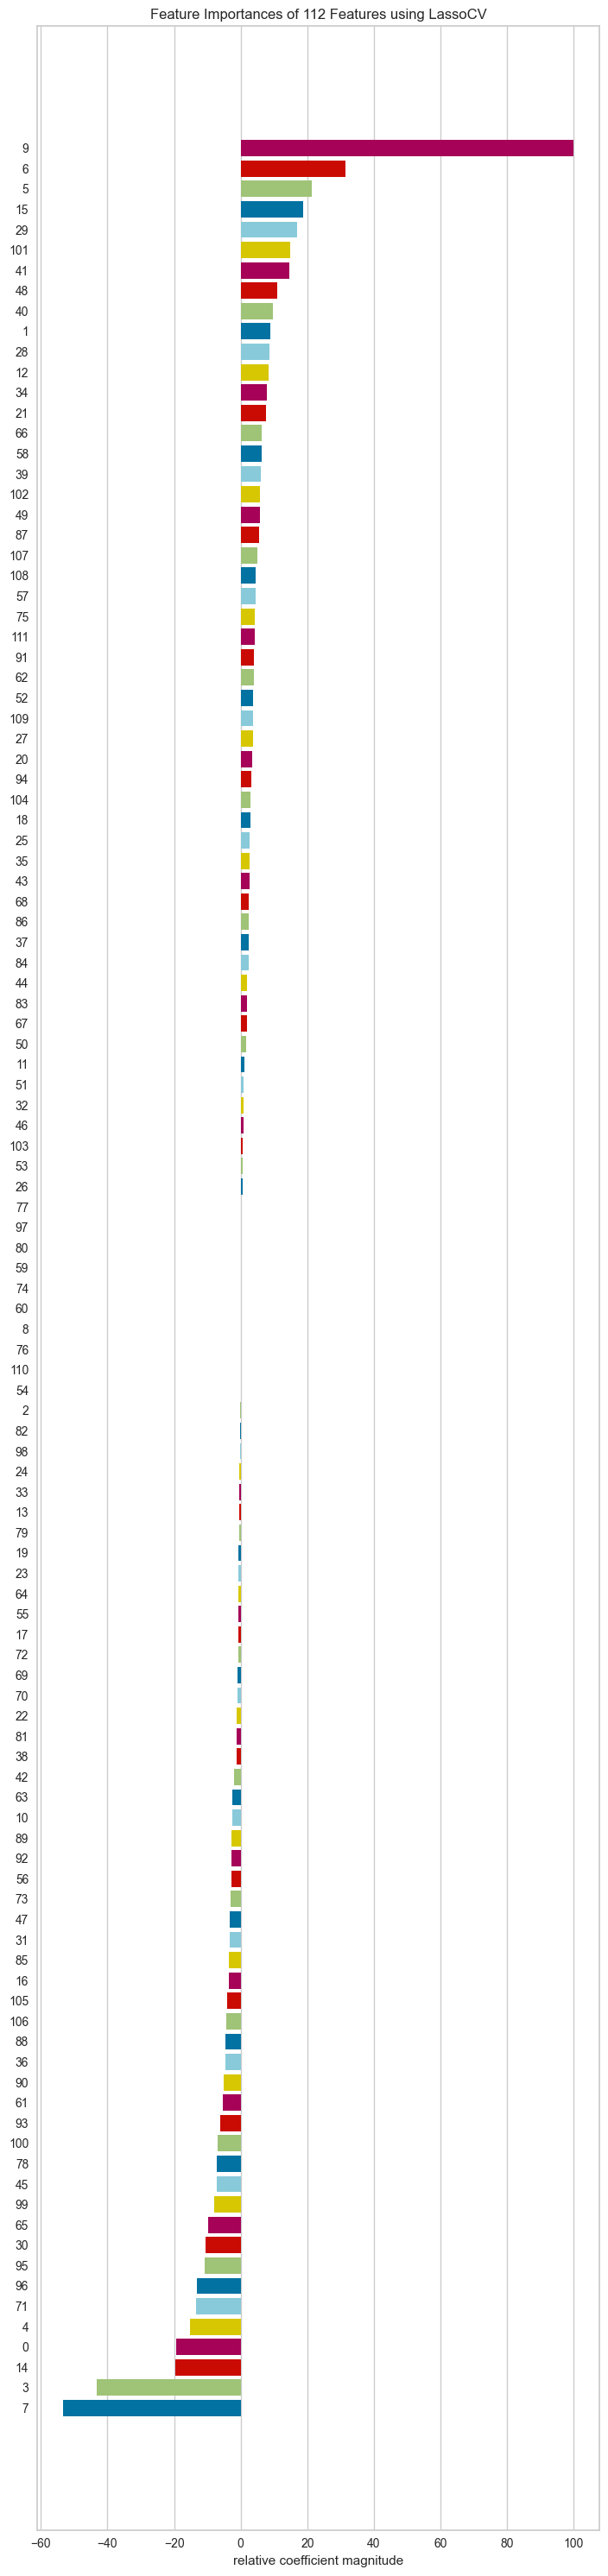

<Axes: title={'center': 'Feature Importances of 112 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [265]:
viz = FeatureImportances(lasso_cv, labels = pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720,3000))
viz.fit(X_train, y_train)
viz.show()

In [266]:
df.iloc[:,[0,3,4, 5,6,7,9,14,15,29]]

make_model  vat            km  Type  Fuel  Gears  Previous_Owners  \
0               0    1  56013.000000     4     1    7.0              2.0   
1               0    0  80000.000000     4     0    7.0              1.0   
2               0    1  83450.000000     4     1    7.0              1.0   
3               0    1  73000.000000     4     1    6.0              1.0   
4               0    1  16200.000000     4     1    7.0              1.0   
...           ...  ...           ...   ...   ...    ...              ...   
15910           8    1   1647.362609     2     1    6.0              1.0   
15911           8    1   9900.000000     4     0    7.0              1.0   
15912           8    1     15.000000     3     1    6.0              1.0   
15913           8    1     10.000000     3     1    6.0              1.0   
15914           8    1   1647.362609     0     0    6.0              1.0   

       Gearing_Type  Displacement_cc  Electrically heated windshield  
0                 0           1422.0                               0  
1                 0           1798.0                               0  
2                 0           1598.0                               0  
3                 0           1422.0                               0  
4                 0           1422.0                               0  
...             ...              ...                             ...  
15910             0           1997.0                               0  
15911             0           1798.0                               1  
15912             0           1997.0                               1  
15913             0           1997.0                               0  
15914             0           1798.0                               0  

[15912 rows x 10 columns]

## <font color='blue'> <b>GridSearchCV</b><font color='black'>

In [267]:
from sklearn.model_selection import GridSearchCV

In [268]:
elastic_cv = ElasticNet(max_iter = 10000, random_state = 42)

In [269]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
             "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [270]:
grid_model = GridSearchCV(estimator= elastic_cv,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 10, verbose = 2)

In [271]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   3.6s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   3.4s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [272]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [273]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [274]:
gscv = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gscv

GridSearch_train  GridSearch_test
R2        8.448833e-01     8.411148e-01
mae       2.110798e+03     2.132470e+03
mse       8.532153e+06     8.320393e+06
rmse      2.920985e+03     2.884509e+03

## <font color='blue'> <b>Model Comparison</b><font color='black'>

In [275]:
pd.concat([lrr, rcv,lcv,ecv,gscv], axis = 1).round(3)

linear_train  linear_test  Ridge_CV_train  Ridge_CV_test  \
R2           0.845        0.841           0.845          0.841   
mae       2111.075     2133.080        2110.845       2132.580   
mse    8531986.797  8324429.396     8532211.708    8321343.862   
rmse      2920.956     2885.209        2920.995       2884.674   

      lasso_cv_train  lasso_cv_test  elastic_cv_train  elastic_cv_test  \
R2             0.845          0.841             0.845            0.841   
mae         2110.182       2130.678          2110.168         2130.087   
mse      8535844.522    8308631.582       8539871.264      8306538.581   
rmse        2921.617       2882.470          2922.306         2882.107   

      GridSearch_train  GridSearch_test  
R2               0.845            0.841  
mae           2110.798         2132.470  
mse        8532152.637      8320392.735  
rmse          2920.985         2884.509

## 7. Visually Compare Models Performance In a Graph

## Prediction new observation

## random state=42